In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [50]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

## MAIN DATA

In [5]:
data = pd.read_csv('/kaggle/input/dyslipidemia-tbzmed/output2-dyslipidemia.csv')
data.head()

,sex,tedadaza,age,tahol,tahsilat,shogl,BMIrotbe,kamarzanan,kamarmardan,feshrdarj2,iaesegi,sabegegalb,sabegemagz,sabediabet,sabesaratan,sabegeasm,sabegekabed,sabegekamkhooni,sabegeezterab,sabegeporfeshari,sabegecharbiekhoon,Q1a,Q2a,rosmosbat,rosegradeee,WHS1,GADrotbe,Q1,Q2,FBS,diabetcas,diabeti,Ferritin,anemia,ALT,HB,AST,serumvitD,serumvitDrotb,dyslipd,metabolicsyndrome,saranrognimejamed,faaliat,Physicalactiv,waisttoheightratio,feshartotal,prehyper,hyper1,hyper2,protein,fat,saturfat,polyfat,linoleicfat,epa,sodium,iron,magnesium,zinc,manganese,fluoride,vitaminA,vitaminE,vitaminB1,vitaminB3,folate,pantacid,vitaminc,vitamink,solublefiber,crudefiber,glucose,kilocalories,carbohydrate,cholestrol,monofat,oleicfat,linolenicfat,DHA,potassium,calcium,phosphorus,copper,selenium,chromium,betacarotene,atocopherol,riboB2,pyridoxineB6,cobalaminB12,biotin,vitaminD,dieteryfiber,insolfiber,suger,caffeine,exmilk,exveg,exfruit,exbread,exmeat,exfat,percpro,perccarb,percfat,nansonati,nanrogani,berengsefid,berenjsaboosdar,gooshtkamcharb,gooshtporcharb,morgbapoost,morgbipoost,shirkamcharb,shirporcharb,shircacao,mastkamcharb,mastporcharb,mastkhame,mastchekide,panirmamooli,panirkhamei,panirmahali,rogjamedheiv,rogjamedgiahi,rogjameddonbe,mayecanola,mayesaier,namakioddar,RFAC1_1,RFAC2_1,RFAC3_1
0,2,4,29,2,2,5,0,1,2,5,0,2,2,1,2,2,1,2,1,2,2,0,0,2,0,2,1,0,0,90.0,0,1,83.30,2.0,21.0,13.8,20.0,20.8,2,1,2,34.412025,2,1,0,2,2,1,2,180.215316,226.612379,131.084102,16.766051,13.255908,0.021733,11363.29611,29.479437,557.667146,24.184211,4.621102,43126.45656,2270.293146,3.242412,1.486534,19.009561,567.665898,15.037097,370.730024,319.602403,0.361403,5.948473,13.397034,3648.495206,264.536383,662.256699,117.290915,84.997415,2.156206,0.018558,5507.150046,3810.575218,3325.748058,12.692445,0.211502,1.955476,485.516151,17.794342,3.916119,2.4771,10.278039,57.426357,15.298498,17.67875,2.306655,118.657104,265.950413,1.736165,4.040049,1.977427,8.462864,22.016748,29.537864,19.328571,25.982222,54.334729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,282.121891,308.995025,285.848259
1,2,3,52,2,2,5,4,1,2,1,2,1,2,2,2,2,2,2,2,1,2,0,0,2,0,2,1,0,0,88.0,0,1,41.50,2.0,12.0,14.0,17.0,18.0,3,1,2,41.666667,2,1,2,1,2,2,2,172.600000,219.600000,133.100000,10.380000,7.804000,0.007000,12165.00000,11.240000,360.700000,21.800000,2.906000,23747.00000,2244.000000,2.089000,1.340000,17.810000,494.200000,13.820000,524.800000,317.300000,0.196000,3.436000,8.568000,3261.000000,157.500000,652.600000,62.960000,52.540000,1.896000,0.019000,4105.000000,3727.000000,3057.000000,1.016000,0.199000,0.021000,575.300000,6.406000,3.606000,2.2940,9.278000,38.230000,14.750000,13.02000,1.409000,46.880000,152.500000,0.400000,1.700000,1.200000,6.800000,23.700000,27.800000,21.000000,19.000000,60.000000,2,1,1,2,1,2,2,1,1,1,1,1,1,2,2,1,2,2,2,1,2,2,1,1,249.000000,23.000000,446.000000
2,2,5,42,2,2,5,4,1,1,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,1,1,4,81.0,0,1,34.60,2.0,17.0,14.3,15.0,10.3,3,2,2,34.412025,2,2,2,1,1,2,2,191.100000,244.000000,149.200000,16.110000,13.460000,0.000000,12997.00000,10.050000,397.100000,26.200000,4.416000,46793.00000,2167.000000,1.156000,1.268000,15.550000,564.900000,16.590000,126.700000,403.800000,0.140000,4.744000,5.585000,3478.000000,136.900000,779.900000,64.970000,49.350000,1.854000,0.000000,4423.000000,4654.000000,3664.000000,1.173000,0.220000,0.010000,364.500000,8.340000,4.808000,2.4910,11.900000,38.310000,14.470000,11.07000,0.981000,44.070000,288.900000,1.500000,5.000000,0.200000,4.100000,24.600000,31.600000,22.000000,16.000000,69.000000,2,1,0,0,1,2,2,1,1,2,2,1,2,2,2,1,2,2,2,1,2,2,1,1,11.000000,178.000000,48.000000
3,1,5,15,1,2,3,3,1,2,1,0,2,2,2,2,2,2,2,2,2,2,0,0,2,0,2,2,1,4,88.0,0,1,73.70,2.0,104.0,15.2,53.0,33.7,1,1,1,34.412025,2,3,2,1,2,2,2,220.700000,292.900000,182.200000,12.640000,9.363000,0.000000,15203.00000,11.230000,406.000000,27.870000,2.827000,16240.00000,2398.000000,1.969000,1.398000,18.470000,538.000000,19.450000,116.800000,357.500000,0.332000,5.841000,9.398000,4267.000000,197.200000,779.0

### changing columns to prfesional terms

In [6]:
new_columns = [
    "sex", "Number of family members", "age", "Marital Status", "Education Level", "Occupation",
    "BMI (Body Mass Index) Category", "Female Waist Circumference", "Male Waist Circumference",
    "feshrdarj2", "Menopause", "History of Heart Disease", "History of Brain Consumption", 
    "History of Diabetes", "History of Cancer", "History of Asthma", "History of Liver diseases", 
    "History of anemia", "History of Anxiety", "History of High Blood Pressure", "History of hyperlipidemia",
    "Q1a", "Q2a", "ros+", "rosegradeee", "WHS1", "GADrotbe", "Q1", "Q2", "FBS", "diabetcas", "diabeti",
    "Ferritin", "anemia", "ALT", "HB", "AST", "serumvitD", "serumvitDrotb","dyslipd", "metabolicsyndrome", 
    "semi-solid oil per capita", "activity", "Physicalactiv", "waisttoheightratio", "total blood pressure", 
    "prehyper", "hyper1", "hyper2", "protein", "fat", "saturfat", "polyfat", "linoleicfat", "epa", "sodium", 
    "iron", "magnesium", "zinc", "manganese", "fluoride", "vitaminA", "vitaminE", "vitaminB1", "vitaminB3", 
    "folate", "pantacid", "vitaminc", "vitamink", "solublefiber", "crudefiber", "glucose", "kilocalories", 
    "carbohydrate", "cholestrol", "monofat", "oleicfat", "linolenicfat", "DHA", "potassium", "calcium", 
    "phosphorus", "copper", "selenium", "chromium", "betacarotene", "atocopherol", "riboB2", "pyridoxineB6", 
    "cobalaminB12", "biotin", "vitaminD", "dieteryfiber", "insolfiber", "suger", "caffeine", "exmilk", 
    "exveg", "exfruit", "exbread", "exmeat", "exfat", "percpro", "perccarb", "percfat", "cottage bread", 
    "oliy bread", "white rice", "whole grain rice", "low fat meat", "high fat meat", "skinned chicken", 
    "skinless chicken", "low fat milk", "high fat milk", "chocolate milk", "low fat yogurt", "high fat yogurt", 
    "creamy youghurt", "greek yogurt", "normal white cheese", "creamy cheese", "cottage cheese", 
    "solid animal oil", "solid vegetable oil", "fat tail oil", "liquid canola oil", "mayesaier", 
    "Iodized salt", "RFAC1_1", "RFAC2_1", "RFAC3_1"
]

data.columns=new_columns

## Data Information

In [7]:
data_info = pd.DataFrame({
    'Column': data.columns,
    'Non-Null Count': data.notnull().sum(),
    'Null Count': data.isnull().sum(),
    'Dtype': data.dtypes
})
data_info.reset_index(drop=True, inplace=True)

In [8]:
data_info.head()

,Column,Non-Null Count,Null Count,Dtype
0,sex,547,0,int64
1,Number of family members,547,0,object
2,age,547,0,int64
3,Marital Status,547,0,int64
4,Education Level,547,0,int64


#### Columns with NULL data

In [9]:
data_info[data_info['Null Count'] != 0]

,Column,Non-Null Count,Null Count,Dtype


#### Different datatypes of data

In [10]:
data_info['Dtype'].unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

##### Columns with "OBJECT" Datatype

In [11]:
data_info[data_info['Dtype'] == 'O']

,Column,Non-Null Count,Null Count,Dtype
1,Number of family members,547,0,object
5,Occupation,547,0,object
11,History of Heart Disease,547,0,object
12,History of Brain Consumption,547,0,object
13,History of Diabetes,547,0,object
14,History of Cancer,547,0,object
15,History of Asthma,547,0,object
16,History of Liver diseases,547,0,object
17,History of anemia,547,0,object
18,History of Anxiety,547,0,object


#### Unique values of columns with 'OBJECT' datatype

In [12]:
object_columns = data.select_dtypes(include='object').columns

for column in object_columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("-" * 50)

Column: Number of family members
Unique values: ['4' '3' '5' '1' '2' '6' ' ' '7' '8' '10']
--------------------------------------------------
Column: Occupation
Unique values: ['5' '3' '4' '2' '6' '1' ' ']
--------------------------------------------------
Column: History of Heart Disease
Unique values: ['2' '1' ' ']
--------------------------------------------------
Column: History of Brain Consumption
Unique values: ['2' '1' '22' ' ' '12']
--------------------------------------------------
Column: History of Diabetes
Unique values: ['1' '2' ' ' '3']
--------------------------------------------------
Column: History of Cancer
Unique values: ['2' '1' ' ']
--------------------------------------------------
Column: History of Asthma
Unique values: ['2' '1' ' ']
--------------------------------------------------
Column: History of Liver diseases
Unique values: ['1' '2' ' ']
--------------------------------------------------
Column: History of anemia
Unique values: ['2' '1' ' ']
----------

#### Unique values of columns with 'INT' datatype

In [13]:
object_columns = data.select_dtypes(include='int64').columns

for column in object_columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}")
    print("-" * 50)

Column: sex
Unique values: [2 1 3]
--------------------------------------------------
Column: age
Unique values: [29 52 42 15 21 41 18 35 44 62 50 34 54 60 46 28 51 49 63 45 57 58 71 32
 22 43 40 72 39 31 26 36 56 24 53 55 27 47 59 38 37 25 33 48 30 17 61 16
 23 20 66 65 64 19 74 14]
--------------------------------------------------
Column: Marital Status
Unique values: [2 1]
--------------------------------------------------
Column: Education Level
Unique values: [2 3 1]
--------------------------------------------------
Column: BMI (Body Mass Index) Category
Unique values: [0 4 3 2 5 6 1]
--------------------------------------------------
Column: Female Waist Circumference
Unique values: [1 2]
--------------------------------------------------
Column: Male Waist Circumference
Unique values: [2 1]
--------------------------------------------------
Column: feshrdarj2
Unique values: [5 1 2 0 6 4 3]
--------------------------------------------------
Column: Menopause
Unique values: [ 0 

In [14]:
df= data.copy()

##### Convert Columns with 'OBJECT' dtype to 'INT' dtype in new data frame

In [15]:
def convert_to_float(data):
    for col in data.columns:
        if data[col].dtype == 'object':

            data[col] = data[col].replace(' ', -1)

            data[col] = pd.to_numeric(data[col], errors='coerce').fillna(-1).astype(int)
    return df

df = convert_to_float(df)

In [16]:
df_info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.notnull().sum(),
    'Null Count': df.isnull().sum(),
    'Dtype': df.dtypes
})
df_info.reset_index(drop=True, inplace=True)

#### Different datatypes of new dataframe

In [17]:
df_info['Dtype'].unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [18]:
float_columns = df.select_dtypes(include='float64').columns
int_columns = df.select_dtypes(include='int64').columns

print('Count of FLOAT columns : ',len(float_columns))
print('Count of INT columns : ' , len(int_columns))

Count of FLOAT columns :  67
Count of INT columns :  65


In [19]:
df_info.head()

,Column,Non-Null Count,Null Count,Dtype
0,sex,547,0,int64
1,Number of family members,547,0,int64
2,age,547,0,int64
3,Marital Status,547,0,int64
4,Education Level,547,0,int64


#### Columns with 'OBJECT' dtype in -DATA- but 'INT' dtype in -df-

In [20]:
columns_with_minus1 = [col for col in df.columns if (df[col] == -1).any()]
print(columns_with_minus1)

['Number of family members', 'Occupation', 'History of Heart Disease', 'History of Brain Consumption', 'History of Diabetes', 'History of Cancer', 'History of Asthma', 'History of Liver diseases', 'History of anemia', 'History of Anxiety', 'History of High Blood Pressure', 'History of hyperlipidemia', 'WHS1', 'diabeti', 'metabolicsyndrome', 'activity', 'Physicalactiv', 'total blood pressure']


In [21]:
float_col = df.select_dtypes(include='float64')

float_columns_describe = float_col.describe().round(2)

float_columns_describe = float_columns_describe.transpose()
pd.set_option('display.expand_frame_repr', False)
print(float_columns_describe)


                           count      mean        std     min       25%       50%       75%         max
FBS                        547.0     89.47      30.27    0.00     77.00     86.00     94.00      355.00
Ferritin                   547.0     89.98     159.54    1.24     31.45     67.10    114.25     3337.30
anemia                     547.0      1.90       0.29    1.00      2.00      2.00      2.00        2.00
ALT                        547.0     19.53      16.33    5.00     12.00     16.00     23.00      307.00
HB                         547.0     14.06       1.81    5.58     13.00     14.06     15.00       29.00
AST                        547.0     21.30       6.89    6.00     17.00     20.00     24.00       76.00
serumvitD                  547.0     24.35      21.48    5.00     13.35     19.60     27.35      222.00
semi-solid oil per capita  547.0     34.41      16.46    2.78     33.33     34.41     34.41      166.67
protein                    547.0    180.22     104.03   18.68   

In [24]:
float_columns = df.select_dtypes(include='float64').columns
print(len(float_columns))

67


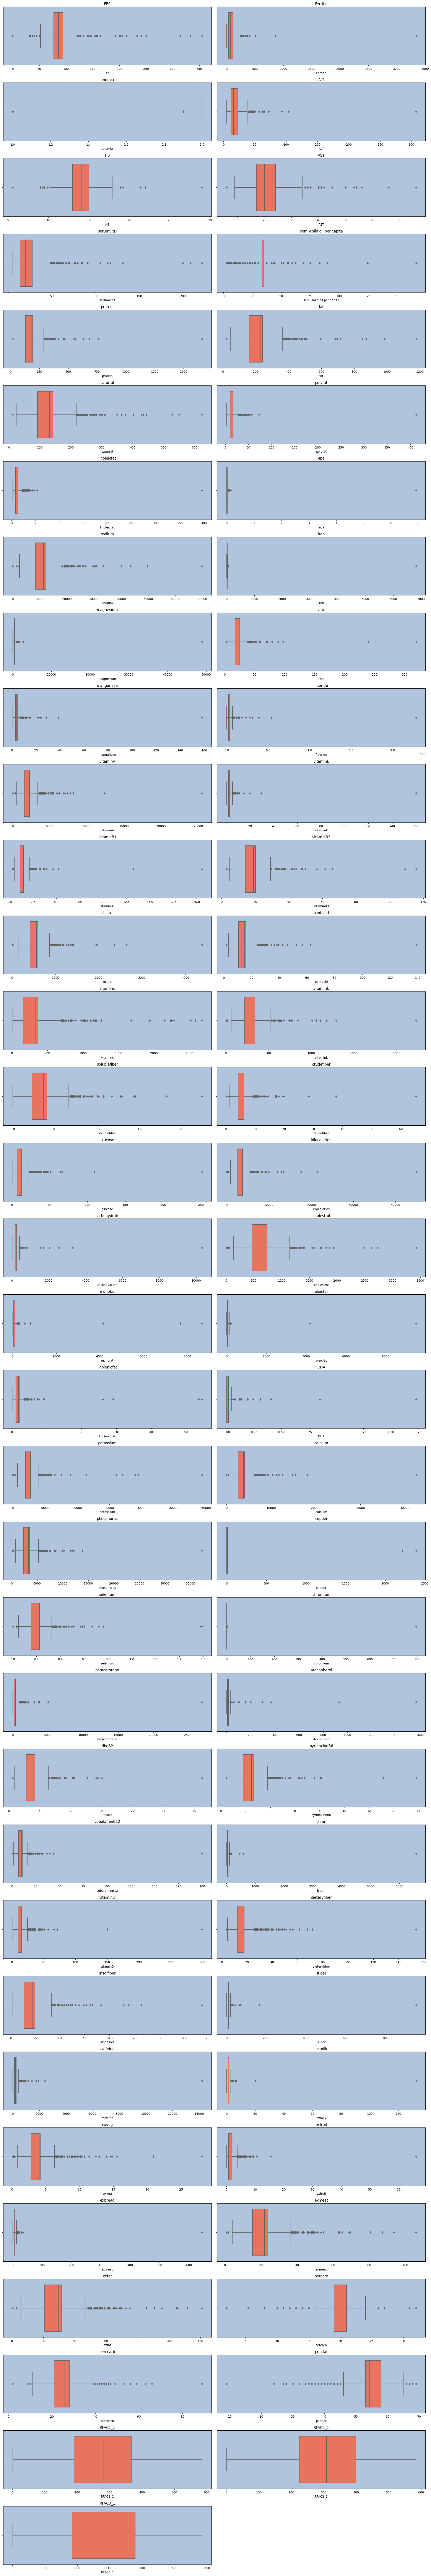

In [ ]:
num_plots = len(float_columns)
num_rows = (num_plots + 1) // 2

fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 3.5))

for i, column in enumerate(float_columns):
    sns.boxplot(x=df[column], orient='h', color='tomato', ax=ax.flatten()[i])
    ax.flatten()[i].set_title(column, loc='center')
    ax.flatten()[i].set_facecolor('lightsteelblue')

if num_plots % 2 != 0:
    ax.flatten()[-1].set_visible(False)

plt.tight_layout()
plt.show()

#### ANEMIA

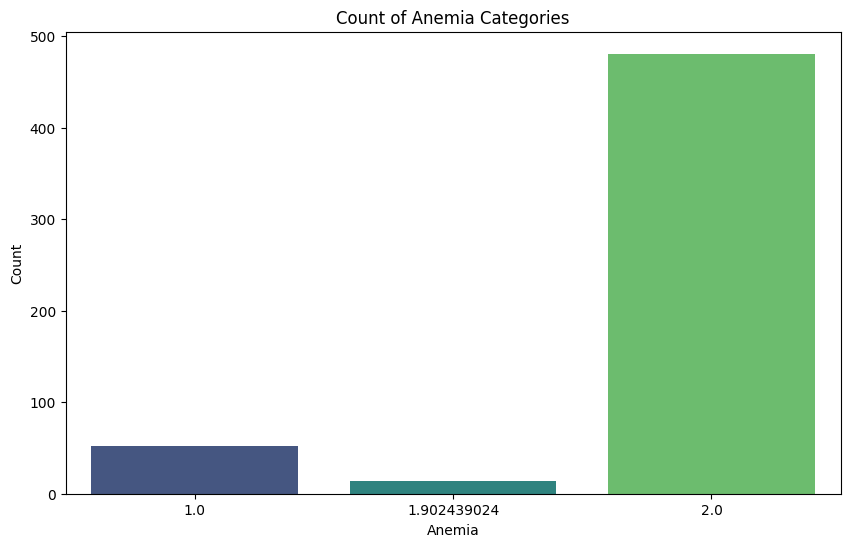

In [22]:
anemia_counts = df['anemia'].value_counts().reset_index()
anemia_counts.columns = ['anemia', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='anemia', y='count', data=anemia_counts, palette='viridis')
plt.title('Count of Anemia Categories')
plt.xlabel('Anemia')
plt.ylabel('Count')
plt.show()

## Binning Float Columns

#### FBS + Ferritin + ALT + AST + HB + serumvitD

In [23]:
FBS_bins = [-float('inf'), 50, 70, 100, 125, float('inf')]
FBS_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['FBS_binned'] = pd.cut(df['FBS'], bins=FBS_bins, labels=FBS_labels)



Ferritin_bins = [-float('inf'), 11, 24, 307, 336, float('inf')]
Ferritin_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['Ferritin_binned'] = pd.cut(df['Ferritin'], bins=Ferritin_bins, labels=Ferritin_labels)


ALT_bins = [-float('inf'), 4, 7, 36, 56, float('inf')]
ALT_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['ALT_binned'] = pd.cut(df['ALT'], bins=ALT_bins, labels=ALT_labels)


AST_bins = [-float('inf'), 8, 33, 40, 50, float('inf')]
AST_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['AST_binned'] = pd.cut(df['AST'], bins=AST_bins, labels=AST_labels)


HB_bins = [-float('inf'), 7, 10, 17.5, 20, float('inf')]
HB_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['HB_binned'] = pd.cut(df['HB'], bins=HB_bins, labels=HB_labels)


serumvitD_bins = [-float('inf'), 10, 20, 50, 100, float('inf')]
serumvitD_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['serumvitD_binned'] = pd.cut(df['serumvitD'], bins=serumvitD_bins, labels=serumvitD_labels)

###  binning other float columns

In [24]:
SSOPC_bins = [-float('inf'), 10, 20, 30, 50, float('inf')]
SSOPC_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['SSOPC_binned'] = pd.cut(df['semi-solid oil per capita'], bins=SSOPC_bins, labels=SSOPC_labels)


protein_bins = [-float('inf'), 50, 100, 200, 300, float('inf')]
protein_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['protein_binned'] = pd.cut(df['protein'], bins=protein_bins, labels=protein_labels)


fat_bins = [-float('inf'), 50, 150, 250, 450, float('inf')]
fat_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['fat_binned'] = pd.cut(df['fat'], bins=fat_bins, labels=fat_labels)


saturfat_bins = [-float('inf'), 50, 100, 200, 250, float('inf')]
saturfat_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['saturfat_binned'] = pd.cut(df['saturfat'], bins=saturfat_bins, labels=saturfat_labels)


polyfat_bins = [-float('inf'), 5, 15, 25, 40, float('inf')]
polyfat_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['polyfat_binned'] = pd.cut(df['polyfat'], bins=polyfat_bins, labels=polyfat_labels)


linoleicfat_bins = [-float('inf'), 5, 10, 15, 25, float('inf')]
linoleicfat_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['linoleicfat_binned'] = pd.cut(df['linoleicfat'], bins=linoleicfat_bins, labels=linoleicfat_labels)


epa_bins = [-float('inf'), 0.02, 0.8, float('inf')]
epa_labels = ['low', 'normal', 'high']
df['epa_binned'] = pd.cut(df['epa'], bins=epa_bins, labels=epa_labels)


sodium_bins = [-float('inf'), 4000, 9000, 15000, 25000, float('inf')]
sodium_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['sodium_binned'] = pd.cut(df['sodium'], bins=sodium_bins, labels=sodium_labels)


iron_bins = [-float('inf'), 5, 10, 20, 50, float('inf')]
iron_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['iron_binned'] = pd.cut(df['iron'], bins=iron_bins, labels=iron_labels)


magnesium_bins = [-float('inf'), 100, 300, 500, 700, float('inf')]
magnesium_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['magnesium_binned'] = pd.cut(df['magnesium'], bins=magnesium_bins, labels=magnesium_labels)


zinc_bins = [-float('inf'), 10, 20, 35, 45, float('inf')]
zinc_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['zinc_binned'] = pd.cut(df['zinc'], bins=zinc_bins, labels=zinc_labels)


manganese_bins = [-float('inf'), 5, 10, 15, 20, float('inf')]
manganese_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['manganese_binned'] = pd.cut(df['manganese'], bins=manganese_bins, labels=manganese_labels)


fluoride_bins = [-float('inf'), 5000, 15000, 30000, 50000, float('inf')]
fluoride_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['fluoride_binned'] = pd.cut(df['fluoride'], bins=fluoride_bins, labels=fluoride_labels)


vitaminA_bins = [-float('inf'), 500, 1000, 2000, 3500, float('inf')]
vitaminA_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['vitaminA_binned'] = pd.cut(df['vitaminA'], bins=vitaminA_bins, labels=vitaminA_labels)


vitaminE_bins = [-float('inf'), 2, 4, 8, 12, float('inf')]
vitaminE_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['vitaminE_binned'] = pd.cut(df['vitaminE'], bins=vitaminE_bins, labels=vitaminE_labels)


vitaminB1_bins = [-float('inf'), 0.5, 1, 1.5, 2.5, float('inf')]
vitaminB1_labels = ['very low', 'low', 'normal', 'high', 'very high']
df['vitaminB1_binned'] = pd.cut(df['vitaminB1'], bins=vitaminB1_bins, labels=vitaminB1_labels)


vitaminB3_bins = [-float('inf'), 5, 10, 20, 30, float('inf')]
vitaminB3_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['VitaminB3_Binned'] = pd.cut(df['vitaminB3'], bins=vitaminB3_bins, labels=vitaminB3_labels)



folate_bins = [-float('inf'), 200, 400, 600, 800, float('inf')]
folate_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Folate_Binned'] = pd.cut(df['folate'], bins=folate_bins, labels=folate_labels)



pantacid_bins = [-float('inf'), 5, 10, 15, 25, float('inf')]
pantacid_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Pantacid_Binned'] = pd.cut(df['pantacid'], bins=pantacid_bins, labels=pantacid_labels)



vitaminc_bins = [-float('inf'), 50, 400, 700, 900, float('inf')]
vitaminc_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Vitaminc_Binned'] = pd.cut(df['vitaminc'], bins=vitaminc_bins, labels=vitaminc_labels)



vitamink_bins = [-float('inf'), 100, 250, 400, 500, float('inf')]
vitamink_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Vitamink_Binned'] = pd.cut(df['vitamink'], bins=vitamink_bins, labels=vitamink_labels)



solublefiber_bins = [-float('inf'), 0.1, 0.3, 0.5, 1, float('inf')]
solublefiber_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Soluble_Fiber_Binned'] = pd.cut(df['solublefiber'], bins=solublefiber_bins, labels=solublefiber_labels)



crudefiber_bins = [-float('inf'), 2, 5, 8, 12, float('inf')]
crudefiber_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Crude_Fiber_Binned'] = pd.cut(df['crudefiber'], bins=crudefiber_bins, labels=crudefiber_labels)



glucose_bins = [-float('inf'), 5, 10, 15, 20, float('inf')]
glucose_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Glucose_Binned'] = pd.cut(df['glucose'], bins=glucose_bins, labels=glucose_labels)



kilocalories_bins = [-float('inf'), 1000, 2000, 3000, 5000, float('inf')]
kilocalories_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Kilocalories_Binned'] = pd.cut(df['kilocalories'], bins=kilocalories_bins, labels=kilocalories_labels)



carbohydrate_bins = [-float('inf'), 100, 200, 300, 400, float('inf')]
carbohydrate_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Carbohydrate_Binned'] = pd.cut(df['carbohydrate'], bins=carbohydrate_bins, labels=carbohydrate_labels)



cholestrol_bins = [-float('inf'), 200, 500, 900, 1200, float('inf')]
cholestrol_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Cholesterol_Binned'] = pd.cut(df['cholestrol'], bins=cholestrol_bins, labels=cholestrol_labels)



monofat_bins = [-float('inf'), 50, 100, 200, 300, float('inf')]
monofat_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Monounsaturated_Fat_Binned'] = pd.cut(df['monofat'], bins=monofat_bins, labels=monofat_labels)



oleicfat_bins = [-float('inf'), 50, 100, 200, 300, float('inf')]
oleicfat_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Oleic_Fat_Binned'] = pd.cut(df['oleicfat'], bins=oleicfat_bins, labels=oleicfat_labels)



linolenicfat_bins = [-float('inf'), 1, 2, 3, 5, float('inf')]
linolenicfat_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Linolenic_Fat_Binned'] = pd.cut(df['linolenicfat'], bins=linolenicfat_bins, labels=linolenicfat_labels)



dha_bins = [-float('inf'), 0.01, 0.02, 0.03, 0.04, float('inf')]
dha_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['DHA_Binned'] = pd.cut(df['DHA'], bins=dha_bins, labels=dha_labels)



potassium_bins = [-float('inf'), 2000, 4000, 6000, 8000, float('inf')]
potassium_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Potassium_Binned'] = pd.cut(df['potassium'], bins=potassium_bins, labels=potassium_labels)



calcium_bins = [-float('inf'), 1000, 2500, 4500, 6000, float('inf')]
calcium_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Calcium_Binned'] = pd.cut(df['calcium'], bins=calcium_bins, labels=calcium_labels)



phosphorus_bins = [-float('inf'), 1000, 2000, 3000, 4500, float('inf')]
phosphorus_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Phosphorus_Binned'] = pd.cut(df['phosphorus'], bins=phosphorus_bins, labels=phosphorus_labels)



copper_bins = [-float('inf'), 1, 5, 10, 20, float('inf')]
copper_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Copper_Binned'] = pd.cut(df['copper'], bins=copper_bins, labels=copper_labels)



selenium_bins = [-float('inf'), 0.05, 0.1, 0.2, 0.35, float('inf')]
selenium_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Selenium_Binned'] = pd.cut(df['selenium'], bins=selenium_bins, labels=selenium_labels)



chromium_bins = [-float('inf'), 0.5, 1, 2, 5, float('inf')]
chromium_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Chromium_Binned'] = pd.cut(df['chromium'], bins=chromium_bins, labels=chromium_labels)



betacarotene_bins = [-float('inf'), 300, 600, 900, 1500, float('inf')]
betacarotene_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Beta_Carotene_Binned'] = pd.cut(df['betacarotene'], bins=betacarotene_bins, labels=betacarotene_labels)



atocopherol_bins = [-float('inf'), 5, 10, 15, 20, float('inf')]
atocopherol_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Alpha_Tocopherol_Binned'] = pd.cut(df['atocopherol'], bins=atocopherol_bins, labels=atocopherol_labels)



riboB2_bins = [-float('inf'), 1, 3, 5, 7, float('inf')]
riboB2_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Riboflavin_Binned'] = pd.cut(df['riboB2'], bins=riboB2_bins, labels=riboB2_labels)



pyridoxineB6_bins = [-float('inf'), 1, 2, 3, 4, float('inf')]
pyridoxineB6_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Pyridoxine_Binned'] = pd.cut(df['pyridoxineB6'], bins=pyridoxineB6_bins, labels=pyridoxineB6_labels)



cobalaminB12_bins = [-float('inf'), 2, 5, 10, 20, float('inf')]
cobalaminB12_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Cobalamin_Binned'] = pd.cut(df['cobalaminB12'], bins=cobalaminB12_bins, labels=cobalaminB12_labels)



biotin_bins = [-float('inf'), 20, 40, 60, 80, float('inf')]
biotin_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Biotin_Binned'] = pd.cut(df['biotin'], bins=biotin_bins, labels=biotin_labels)



vitaminD_bins = [-float('inf'), 5, 10, 15, 20, float('inf')]
vitaminD_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['VitaminD_Binned'] = pd.cut(df['vitaminD'], bins=vitaminD_bins, labels=vitaminD_labels)

In [25]:
dieteryfiber_bins = [-float('inf'), 5, 10, 15, 25, float('inf')]
dieteryfiber_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Dietary_Fiber_Binned'] = pd.cut(df['dieteryfiber'], bins=dieteryfiber_bins, labels=dieteryfiber_labels)



insolfiber_bins = [-float('inf'), 1, 2, 3, 4, float('inf')]
insolfiber_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Insoluble_Fiber_Binned'] = pd.cut(df['insolfiber'], bins=insolfiber_bins, labels=insolfiber_labels)



suger_bins = [-float('inf'), 50, 100, 150, 200, float('inf')]
suger_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Sugar_Binned'] = pd.cut(df['suger'], bins=suger_bins, labels=suger_labels)



caffeine_bins = [-float('inf'), 50, 100, 200, 300, float('inf')]
caffeine_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Caffeine_Binned'] = pd.cut(df['caffeine'], bins=caffeine_bins, labels=caffeine_labels)



exmilk_bins = [-float('inf'), 0.5, 1, 2, 3, float('inf')]
exmilk_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Extra_Milk_Binned'] = pd.cut(df['exmilk'], bins=exmilk_bins, labels=exmilk_labels)



exveg_bins = [-float('inf'), 1, 3, 5, 8, float('inf')]
exveg_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Extra_Vegetables_Binned'] = pd.cut(df['exveg'], bins=exveg_bins, labels=exveg_labels)



exfruit_bins = [-float('inf'), 0.5, 1, 2, 3, float('inf')]
exfruit_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Extra_Fruits_Binned'] = pd.cut(df['exfruit'], bins=exfruit_bins, labels=exfruit_labels)



exbread_bins = [-float('inf'), 2, 5, 10, 15, float('inf')]
exbread_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Extra_Bread_Binned'] = pd.cut(df['exbread'], bins=exbread_bins, labels=exbread_labels)



exmeat_bins = [-float('inf'), 5, 15, 25, 35, float('inf')]
exmeat_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Extra_Meat_Binned'] = pd.cut(df['exmeat'], bins=exmeat_bins, labels=exmeat_labels)



exfat_bins = [-float('inf'), 5, 20, 35, 45, float('inf')]
exfat_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Extra_Fat_Binned'] = pd.cut(df['exfat'], bins=exfat_bins, labels=exfat_labels)



percpro_bins = [-float('inf'), 15, 18, 21, 25, float('inf')]
percpro_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Percentage_Protein_Binned'] = pd.cut(df['percpro'], bins=percpro_bins, labels=percpro_labels)



perccarb_bins = [-float('inf'), 15, 20, 30, 40, float('inf')]
perccarb_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Percentage_Carbohydrate_Binned'] = pd.cut(df['perccarb'], bins=perccarb_bins, labels=perccarb_labels)



percfat_bins = [-float('inf'), 40, 50, 58, 65, float('inf')]
percfat_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['Percentage_Fat_Binned'] = pd.cut(df['percfat'], bins=percfat_bins, labels=percfat_labels)



RFAC1_bins = [-float('inf'), 100, 200, 350, 450, float('inf')]
RFAC1_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['RFAC1_Binned'] = pd.cut(df['RFAC1_1'], bins=RFAC1_bins, labels=RFAC1_labels)



RFAC2_bins = [-float('inf'), 100, 200, 300, 450, float('inf')]
RFAC2_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['RFAC2_Binned'] = pd.cut(df['RFAC2_1'], bins=RFAC2_bins, labels=RFAC2_labels)



RFAC3_bins = [-float('inf'), 100, 200, 300, 400, float('inf')]
RFAC3_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
df['RFAC3_Binned'] = pd.cut(df['RFAC3_1'], bins=RFAC3_bins, labels=RFAC3_labels)

In [26]:
df.head()

,sex,Number of family members,age,Marital Status,Education Level,Occupation,BMI (Body Mass Index) Category,Female Waist Circumference,Male Waist Circumference,feshrdarj2,Menopause,History of Heart Disease,History of Brain Consumption,History of Diabetes,History of Cancer,History of Asthma,History of Liver diseases,History of anemia,History of Anxiety,History of High Blood Pressure,History of hyperlipidemia,Q1a,Q2a,ros+,rosegradeee,WHS1,GADrotbe,Q1,Q2,FBS,diabetcas,diabeti,Ferritin,anemia,ALT,HB,AST,serumvitD,serumvitDrotb,dyslipd,metabolicsyndrome,semi-solid oil per capita,activity,Physicalactiv,waisttoheightratio,total blood pressure,prehyper,hyper1,hyper2,protein,fat,saturfat,polyfat,linoleicfat,epa,sodium,iron,magnesium,zinc,manganese,fluoride,vitaminA,vitaminE,vitaminB1,vitaminB3,folate,pantacid,vitaminc,vitamink,solublefiber,crudefiber,glucose,kilocalories,carbohydrate,cholestrol,monofat,oleicfat,linolenicfat,DHA,potassium,calcium,phosphorus,copper,selenium,chromium,betacarotene,atocopherol,riboB2,pyridoxineB6,cobalaminB12,biotin,vitaminD,dieteryfiber,insolfiber,suger,caffeine,exmilk,exveg,exfruit,exbread,exmeat,exfat,percpro,perccarb,percfat,cottage bread,oliy bread,white rice,whole grain rice,low fat meat,high fat meat,skinned chicken,skinless chicken,low fat milk,high fat milk,chocolate milk,low fat yogurt,high fat yogurt,creamy youghurt,greek yogurt,normal white cheese,creamy cheese,cottage cheese,solid animal oil,solid vegetable oil,fat tail oil,liquid canola oil,mayesaier,Iodized salt,RFAC1_1,RFAC2_1,RFAC3_1,FBS_binned,Ferritin_binned,ALT_binned,AST_binned,HB_binned,serumvitD_binned,SSOPC_binned,protein_binned,fat_binned,saturfat_binned,polyfat_binned,linoleicfat_binned,epa_binned,sodium_binned,iron_binned,magnesium_binned,zinc_binned,manganese_binned,fluoride_binned,vitaminA_binned,vitaminE_binned,vitaminB1_binned,VitaminB3_Binned,Folate_Binned,Pantacid_Binned,Vitaminc_Binned,Vitamink_Binned,Soluble_Fiber_Binned,Crude_Fiber_Binned,Glucose_Binned,Kilocalories_Binned,Carbohydrate_Binned,Cholesterol_Binned,Monounsaturated_Fat_Binned,Oleic_Fat_Binned,Linolenic_Fat_Binned,DHA_Binned,Potassium_Binned,Calcium_Binned,Phosphorus_Binned,Copper_Binned,Selenium_Binned,Chromium_Binned,Beta_Carotene_Binned,Alpha_Tocopherol_Binned,Riboflavin_Binned,Pyridoxine_Binned,Cobalamin_Binned,Biotin_Binned,VitaminD_Binned,Dietary_Fiber_Binned,Insoluble_Fiber_Binned,Sugar_Binned,Caffeine_Binned,Extra_Milk_Binned,Extra_Vegetables_Binned,Extra_Fruits_Binned,Extra_Bread_Binned,Extra_Meat_Binned,Extra_Fat_Binned,Percentage_Protein_Binned,Percentage_Carbohydrate_Binned,Percentage_Fat_Binned,RFAC1_Binned,RFAC2_Binned,RFAC3_Binned
0,2,4,29,2,2,5,0,1,2,5,0,2,2,1,2,2,1,2,1,2,2,0,0,2,0,2,1,0,0,90.0,0,1,83.30,2.0,21.0,13.8,20.0,20.8,2,1,2,34.412025,2,1,0,2,2,1,2,180.215316,226.612379,131.084102,16.766051,13.255908,0.021733,11363.29611,29.479437,557.667146,24.184211,4.621102,43126.45656,2270.293146,3.242412,1.486534,19.009561,567.665898,15.037097,370.730024,319.602403,0.361403,5.948473,13.397034,3648.495206,264.536383,662.256699,117.290915,84.997415,2.156206,0.018558,5507.150046,3810.575218,3325.748058,12.692445,0.211502,1.955476,485.516151,17.794342,3.916119,2.4771,10.278039,57.426357,15.298498,17.67875,2.306655,118.657104,265.950413,1.736165,4.040049,1.977427,8.462864,22.016748,29.537864,19.328571,25.982222,54.334729,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,282.121891,308.995025,285.848259,normal,normal,normal,low,normal,normal,high,normal,normal,normal,normal,normal,normal,normal,high,high,normal,very low,high,high,low,normal,Normal,Normal,High,Low,Normal,Normal,Normal,Normal,High,Normal,Normal,Normal,Low,Normal,Low,Normal,Normal,High,High,High,Normal,Low,High,Normal,Normal,High,Normal,High,High,Normal,Normal,High,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal,High,Normal
1,2,3,52,2,2,5,4,1,2,1,2,1,2,2,2,2,2,2,2,1,2,0,0,2,0,2,1,0,0,88.0,0,1,41.50,2.0,12.0,14.0,17.0,18.0,3,1,2,41.666667,2,1,2,1,2,2,2,172.600000,219.60000

## TARGET COLUMN

In [27]:
df['dyslipd'].unique()

array([1, 2, 0])

In [28]:
df['dyslipd'].value_counts()

dyslipd
1    443
2     88
0     16
Name: count, dtype: int64

### Deleting (0 = Gatherer Error)

In [29]:
df = df[df['dyslipd'] != 0]

df['dyslipd'] = df['dyslipd'].map({1: 0, 2: 1})

df['dyslipd'].value_counts()

dyslipd
0    443
1     88
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Values')

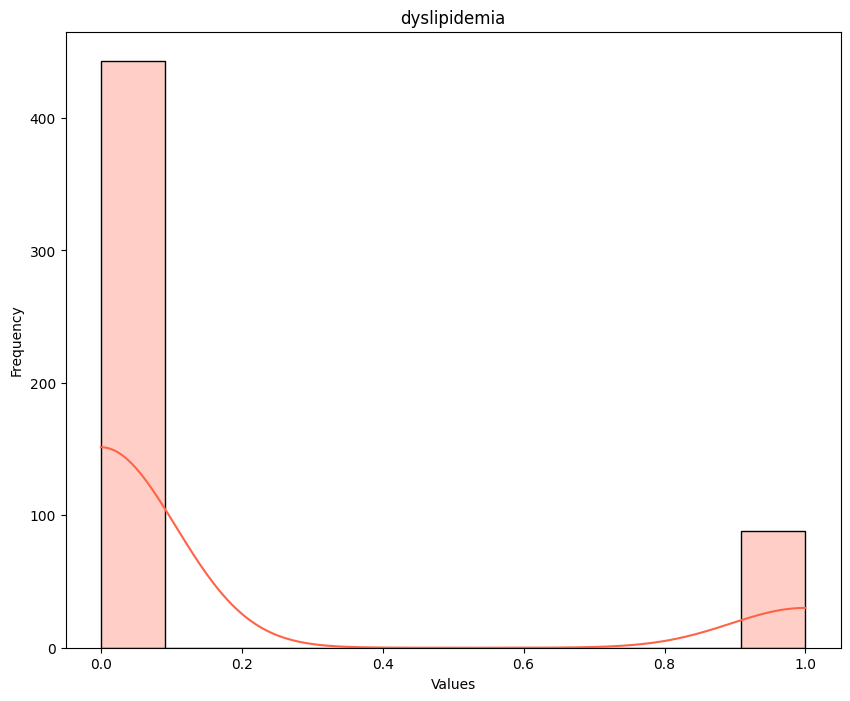

In [51]:
fig1 , ax1 = plt.subplots(figsize=(10,8))
sns.histplot(df['dyslipd'] , kde=True , color='tomato' ,alpha=0.3)
ax1.set_title('dyslipidemia')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Values')

## Plotting the ratio of 'INT' columns with 'DYSLIPD' for studying relations

In [31]:
Int_columns = df.select_dtypes(include=['int64']).columns
Int_columns

Index(['sex', 'Number of family members', 'age', 'Marital Status',
       'Education Level', 'Occupation', 'BMI (Body Mass Index) Category',
       'Female Waist Circumference', 'Male Waist Circumference', 'feshrdarj2',
       'Menopause', 'History of Heart Disease', 'History of Brain Consumption',
       'History of Diabetes', 'History of Cancer', 'History of Asthma',
       'History of Liver diseases', 'History of anemia', 'History of Anxiety',
       'History of High Blood Pressure', 'History of hyperlipidemia', 'Q1a',
       'Q2a', 'ros+', 'rosegradeee', 'WHS1', 'GADrotbe', 'Q1', 'Q2',
       'diabetcas', 'diabeti', 'serumvitDrotb', 'dyslipd', 'metabolicsyndrome',
       'activity', 'Physicalactiv', 'waisttoheightratio',
       'total blood pressure', 'prehyper', 'hyper1', 'hyper2', 'cottage bread',
       'oliy bread', 'white rice', 'whole grain rice', 'low fat meat',
       'high fat meat', 'skinned chicken', 'skinless chicken', 'low fat milk',
       'high fat milk', 'chocolate 

#### AGE

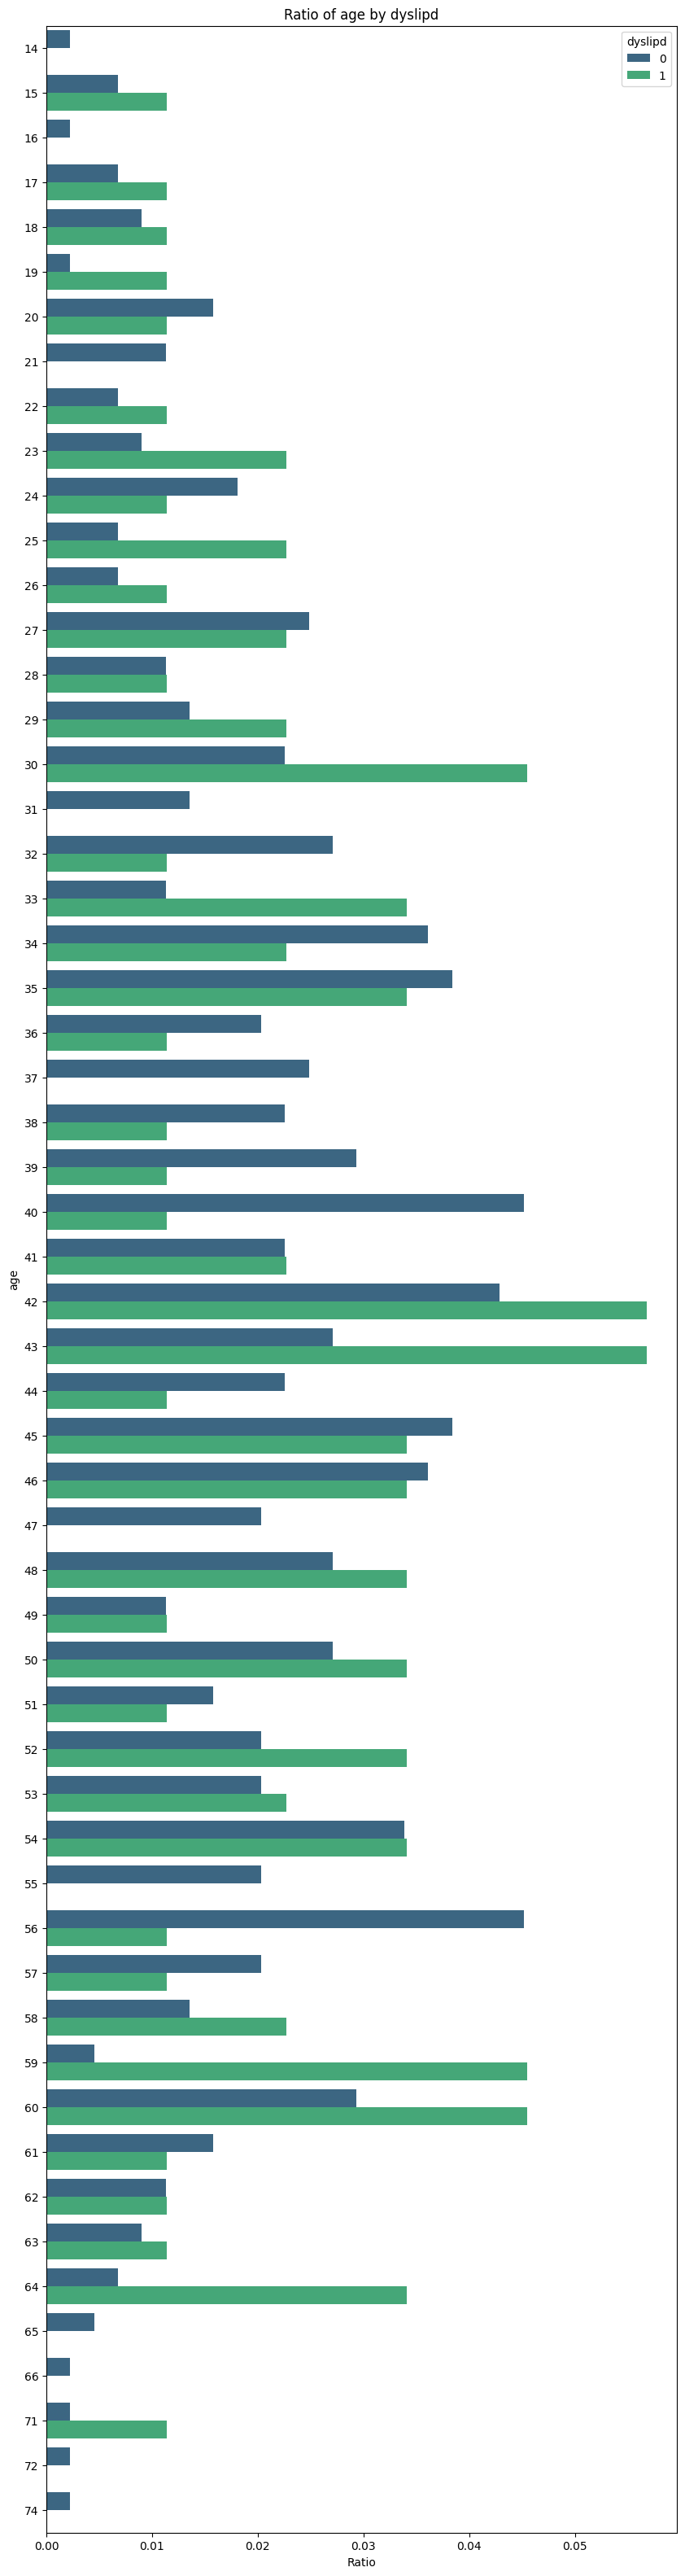

In [32]:
def calculate_and_plot_ratio(data, group_column, value_column):
    # Calculate the total count for each value in group_column
    total_counts = data.groupby(group_column)[value_column].transform('count')
    
    # Calculate the ratio for each group in group_column and value_column
    data['Ratio'] = data.groupby([group_column, value_column])[value_column].transform('count') / total_counts
    
    # Plotting
    plt.figure(figsize=(10, 40))
    ax = sns.barplot(data=data, y=value_column, x='Ratio', hue=group_column, palette='viridis', orient='h')
    ax.set_title(f'Ratio of {value_column} by {group_column}')
    ax.set_ylabel(value_column)
    ax.set_xlabel('Ratio')
    ax.legend(title=group_column) 
    plt.show()

calculate_and_plot_ratio(df, 'dyslipd', 'age')

### A Function for all other plotting

In [87]:
palette_mako = sns.color_palette("mako", 2)
palette_rocket = sns.color_palette("rocket", 3)
palette_viridis = sns.color_palette("viridis", 3)
palette_flare = sns.color_palette("flare", 3)

def calculate_and_plot_ratio(data, group_columns, value_column, ax, palette):
    # Calculate the total count
    total_counts = data.groupby(group_columns[0])[value_column].transform('count')
    
    # Calculate the ratio
    data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
    
    # Plotting
    sns.barplot(data=data, x=value_column, y='Ratio', hue=group_columns[0], palette=palette, ax=ax)
    ax.set_title(f'Ratio of {value_column} by {group_columns[0]}')
    ax.set_xlabel(value_column)
    ax.set_ylabel('Ratio')
    ax.legend(title=group_columns[0])

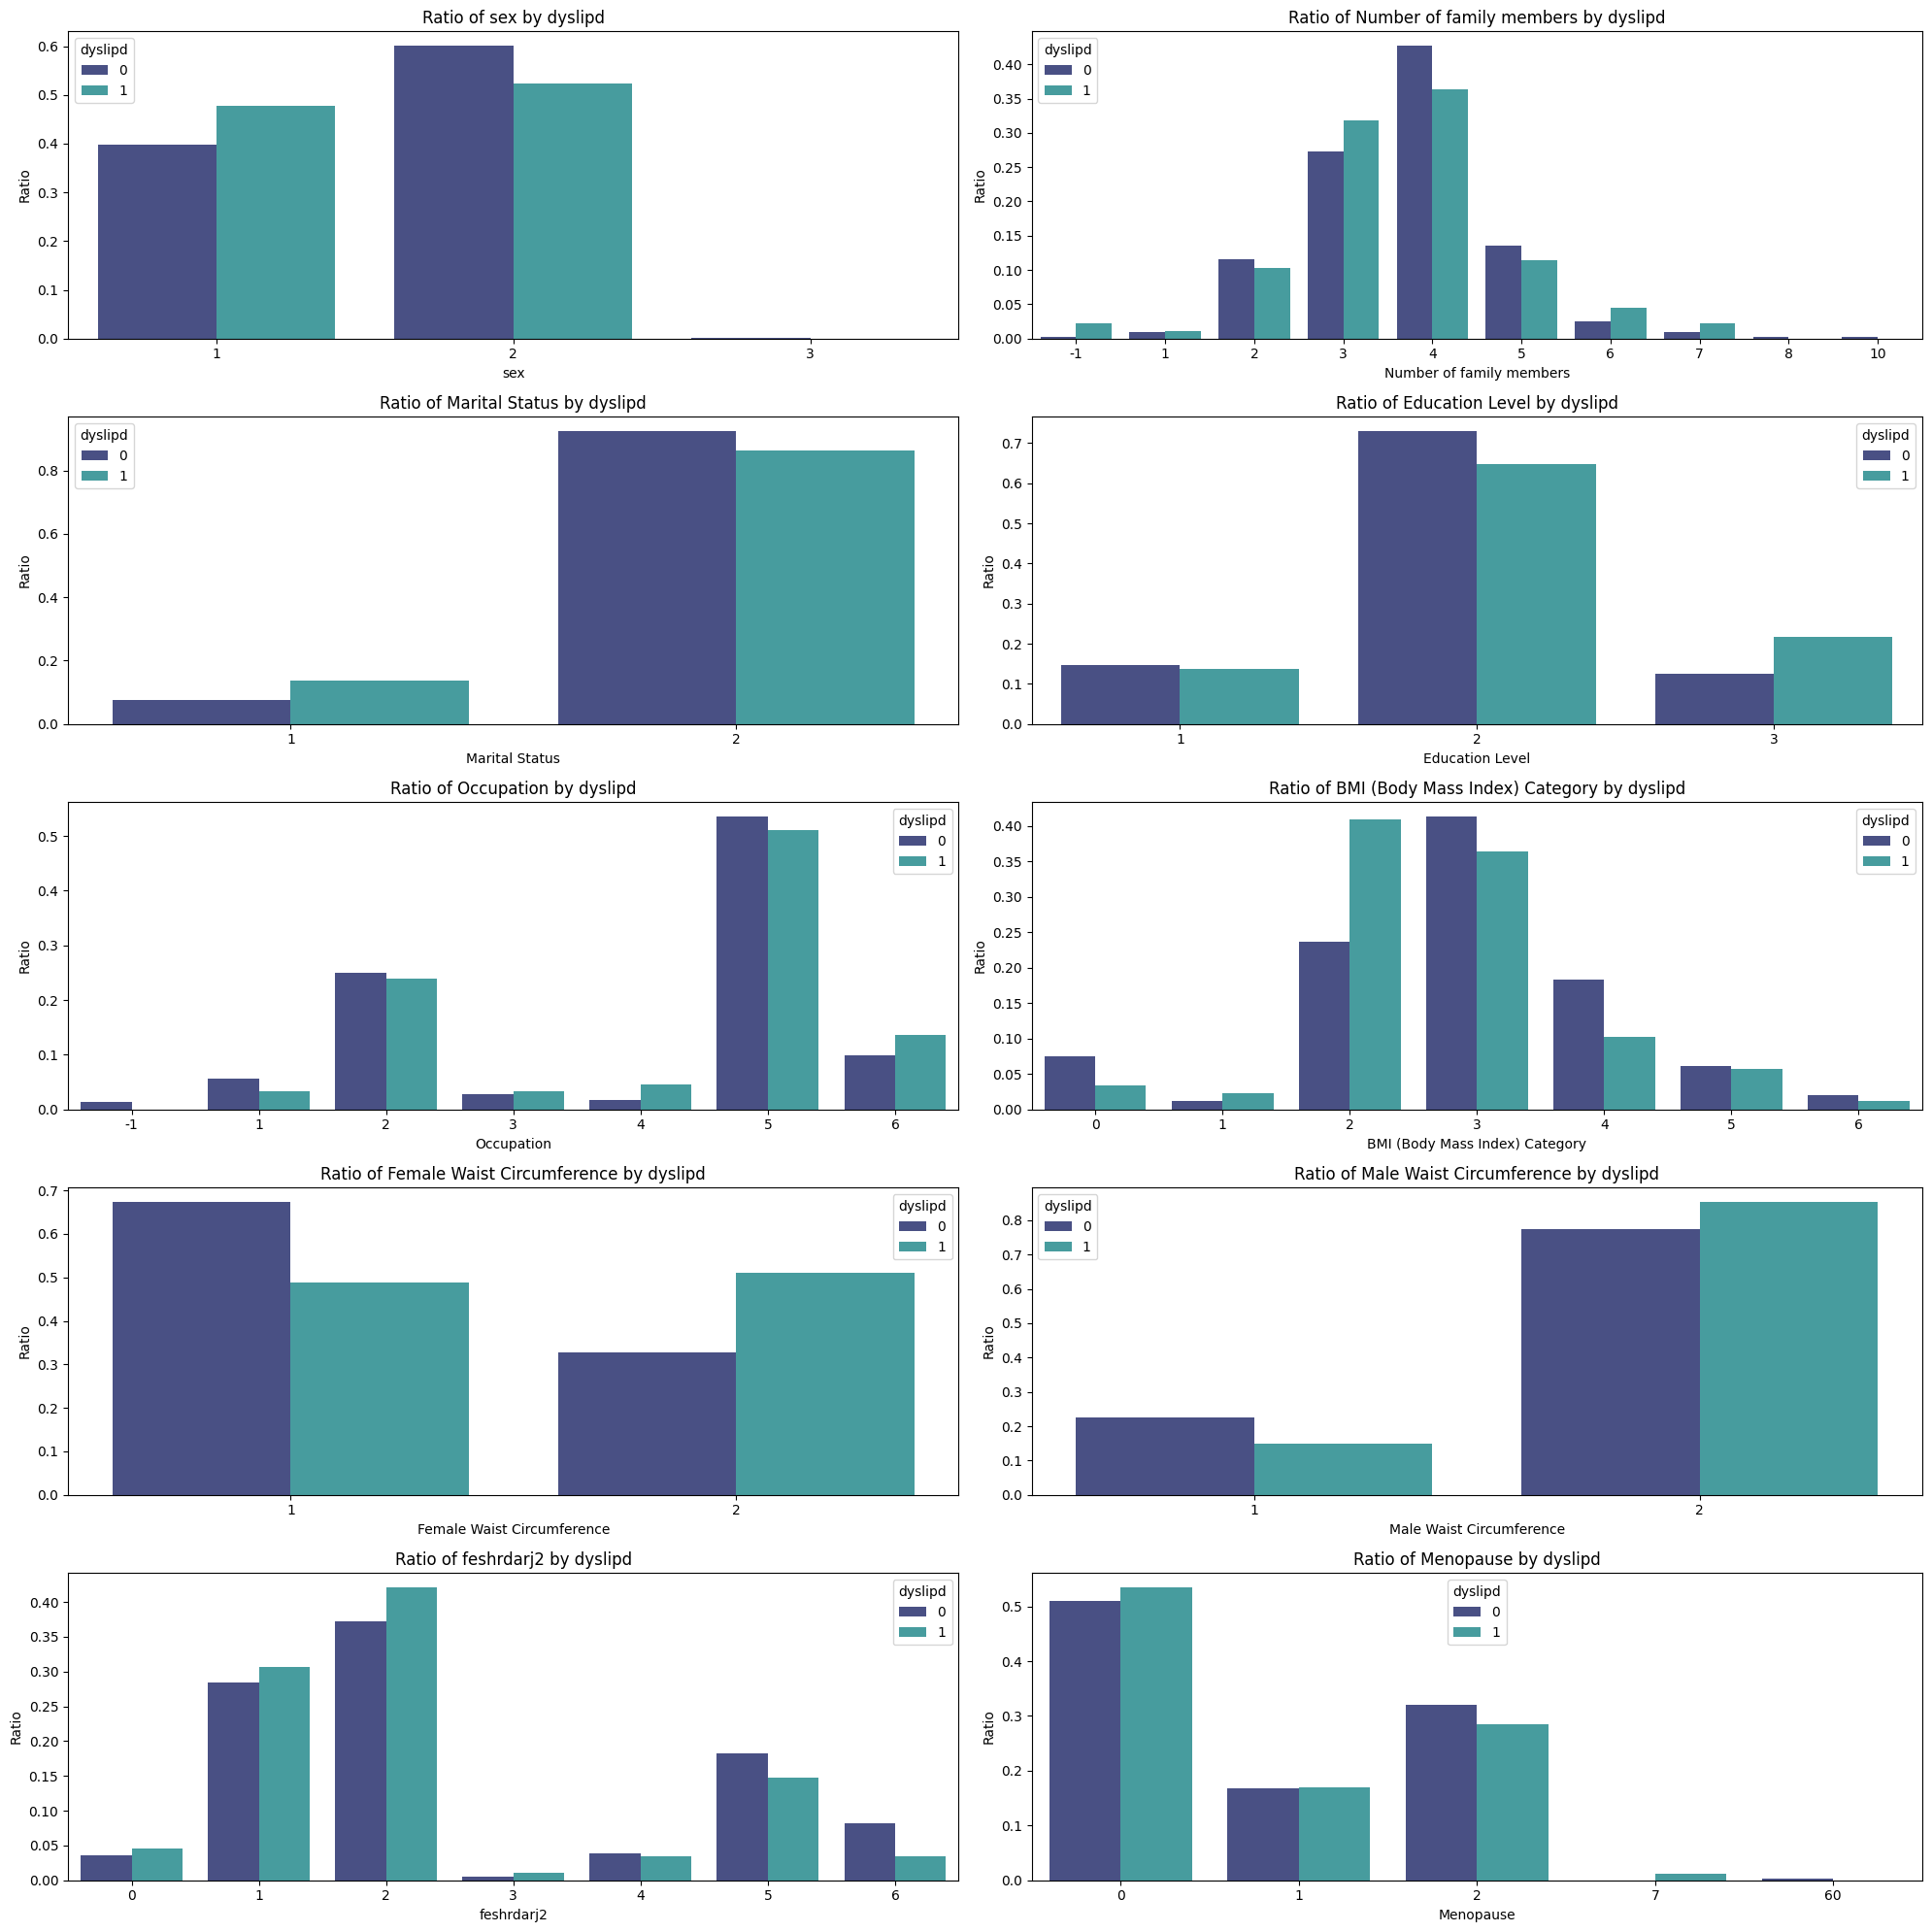

In [70]:
value_columns_mako = [
    ('sex', 'sex'), 
    ('Number of family members', 'Number of family members'), 
    ('Marital Status', 'Marital Status'),
    ('Education Level', 'Education Level'), 
    ('Occupation', 'Occupation'), 
    ('BMI (Body Mass Index) Category', 'BMI (Body Mass Index) Category'),
    ('Female Waist Circumference', 'Female Waist Circumference'), 
    ('Male Waist Circumference', 'Male Waist Circumference'), 
    ('feshrdarj2', 'feshrdarj2'),
    ('Menopause', 'Menopause')
]


fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_mako):
    calculate_and_plot_ratio(df, ['dyslipd', group_col], value_col, ax, palette=palette_mako)

plt.tight_layout()
plt.show()

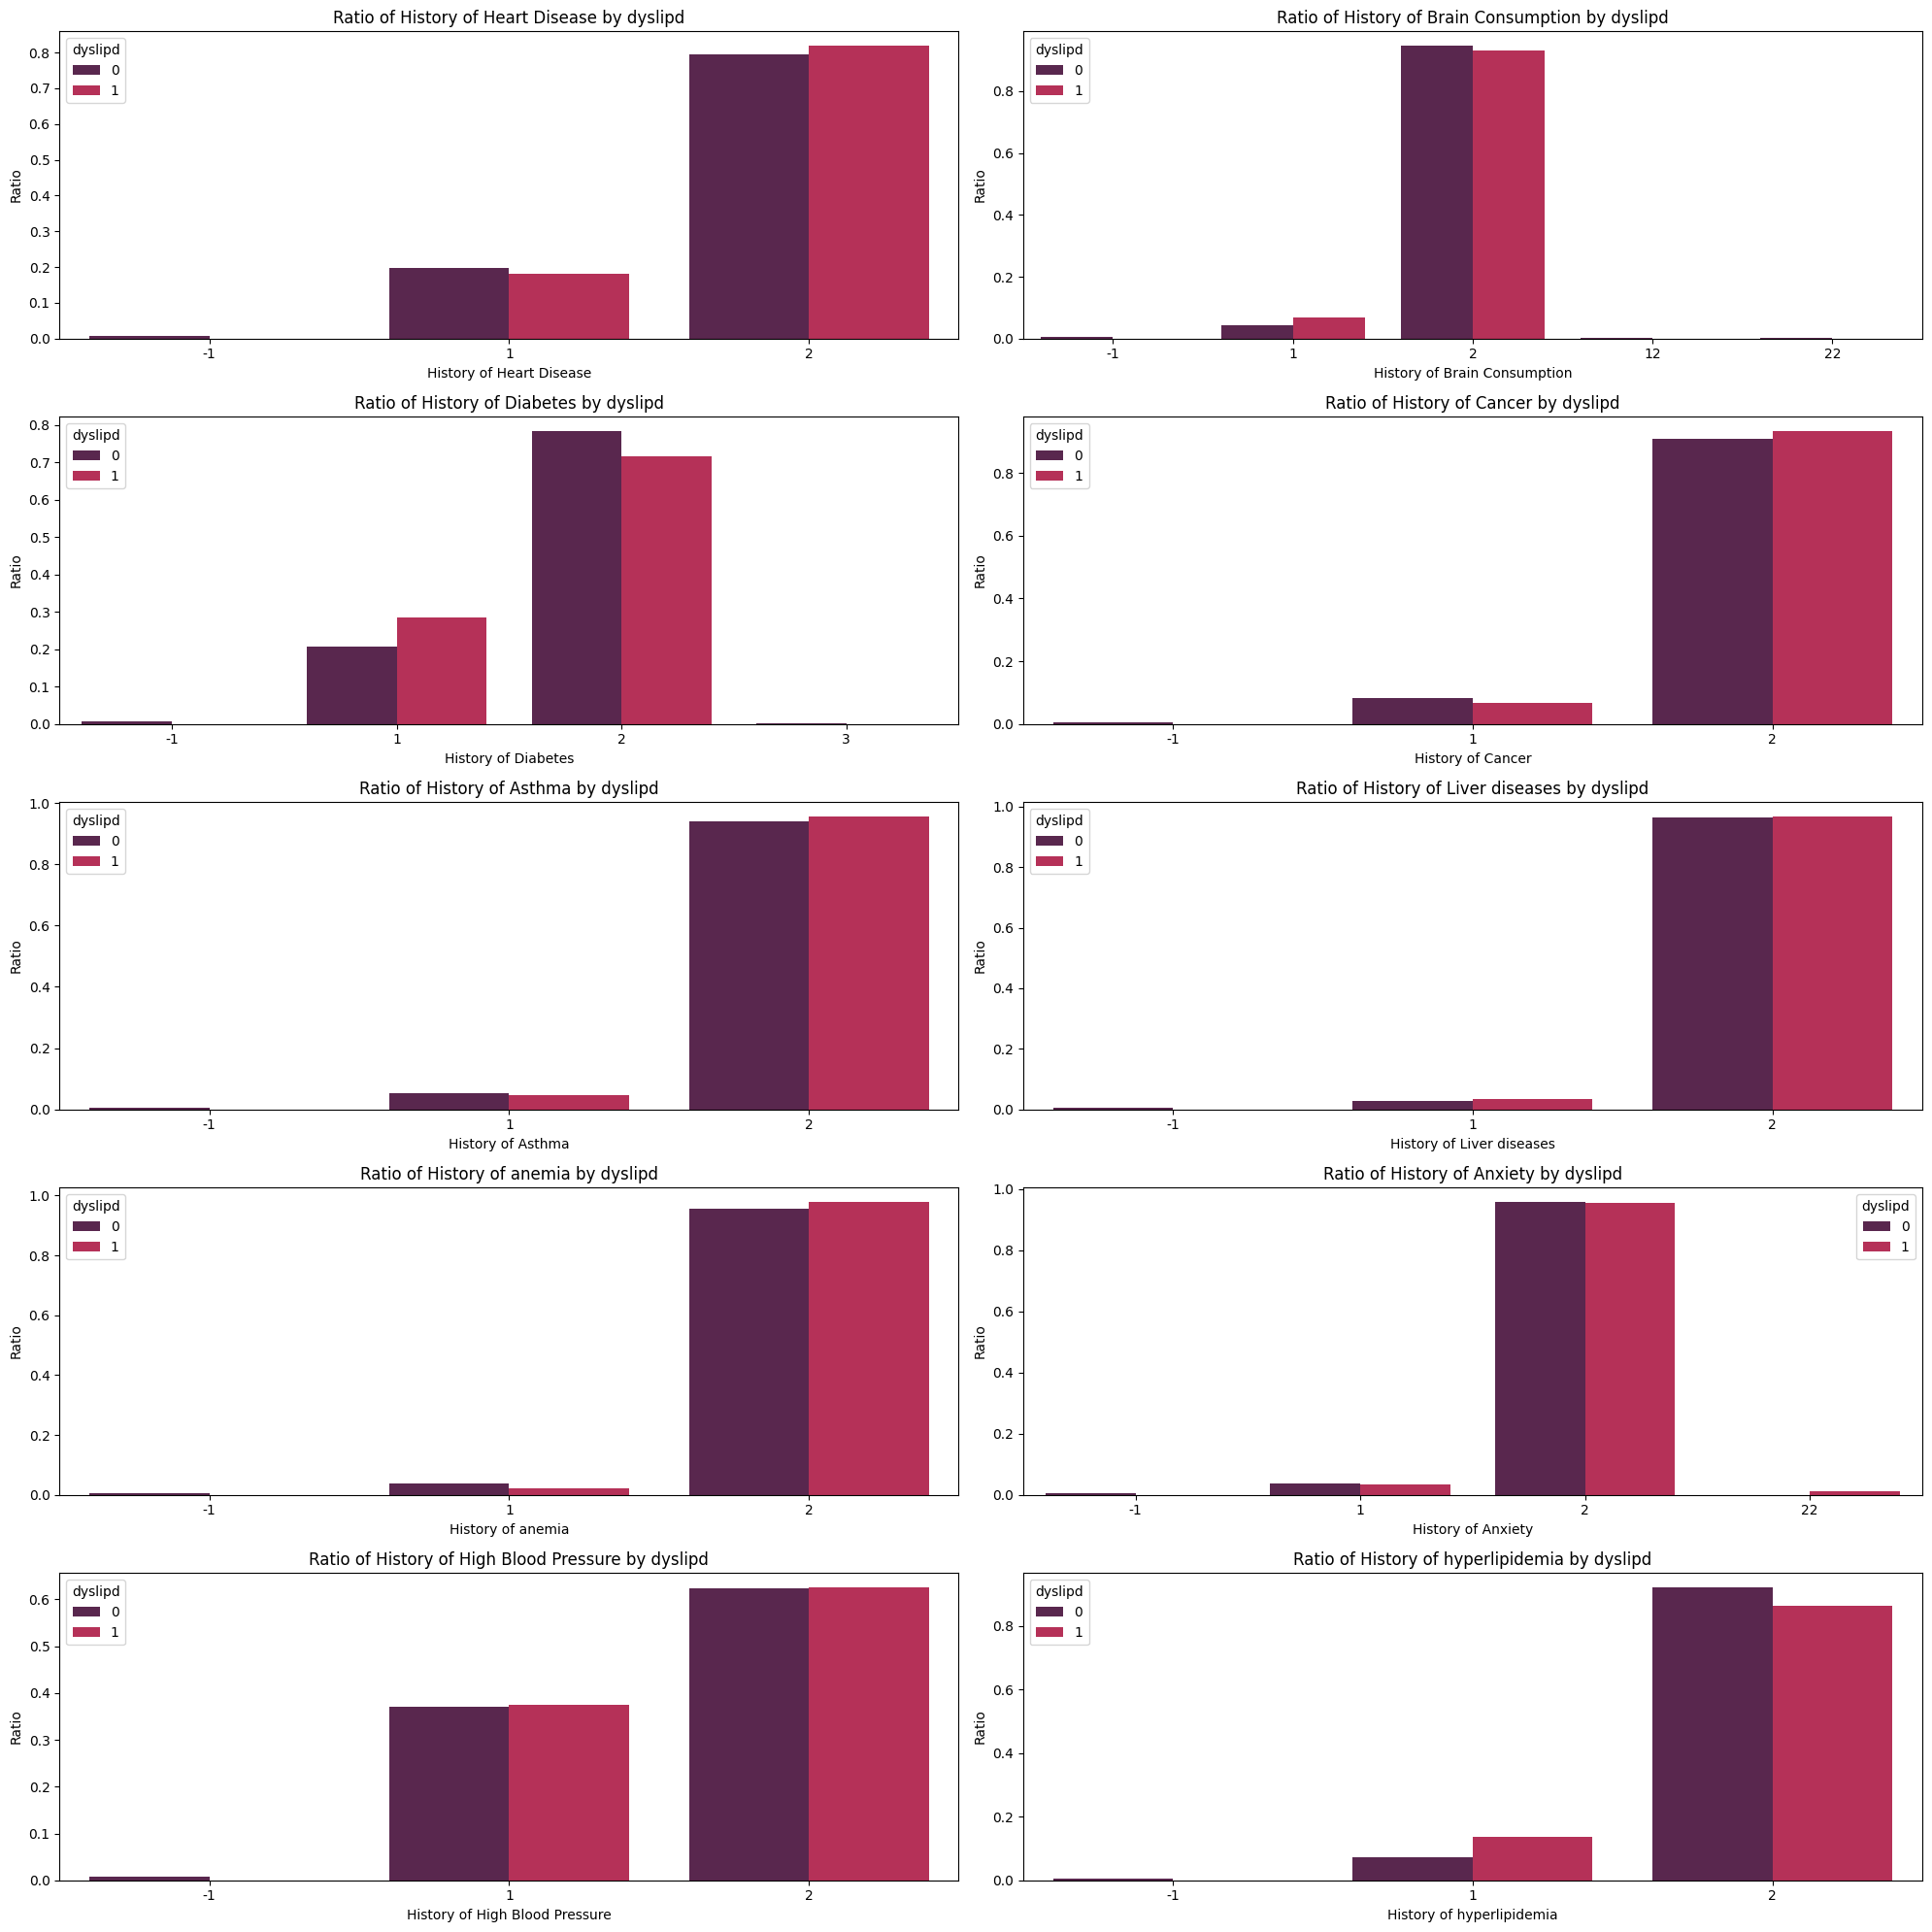

In [71]:
value_columns_rocket  = [
    ('History of Heart Disease', 'History of Heart Disease'), 
    ('History of Brain Consumption', 'History of Brain Consumption'),
    ('History of Diabetes', 'History of Diabetes'),
    ('History of Cancer', 'History of Cancer'), 
    ('History of Asthma', 'History of Asthma'), 
    ('History of Liver diseases', 'History of Liver diseases'),
    ('History of anemia', 'History of anemia'), 
    ('History of Anxiety', 'History of Anxiety'), 
    ('History of High Blood Pressure', 'History of High Blood Pressure'),
    ('History of hyperlipidemia', 'History of hyperlipidemia')
]


fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_rocket):
    calculate_and_plot_ratio(df, ['dyslipd', group_col], value_col, ax, palette=palette_rocket)

plt.tight_layout()
plt.show()

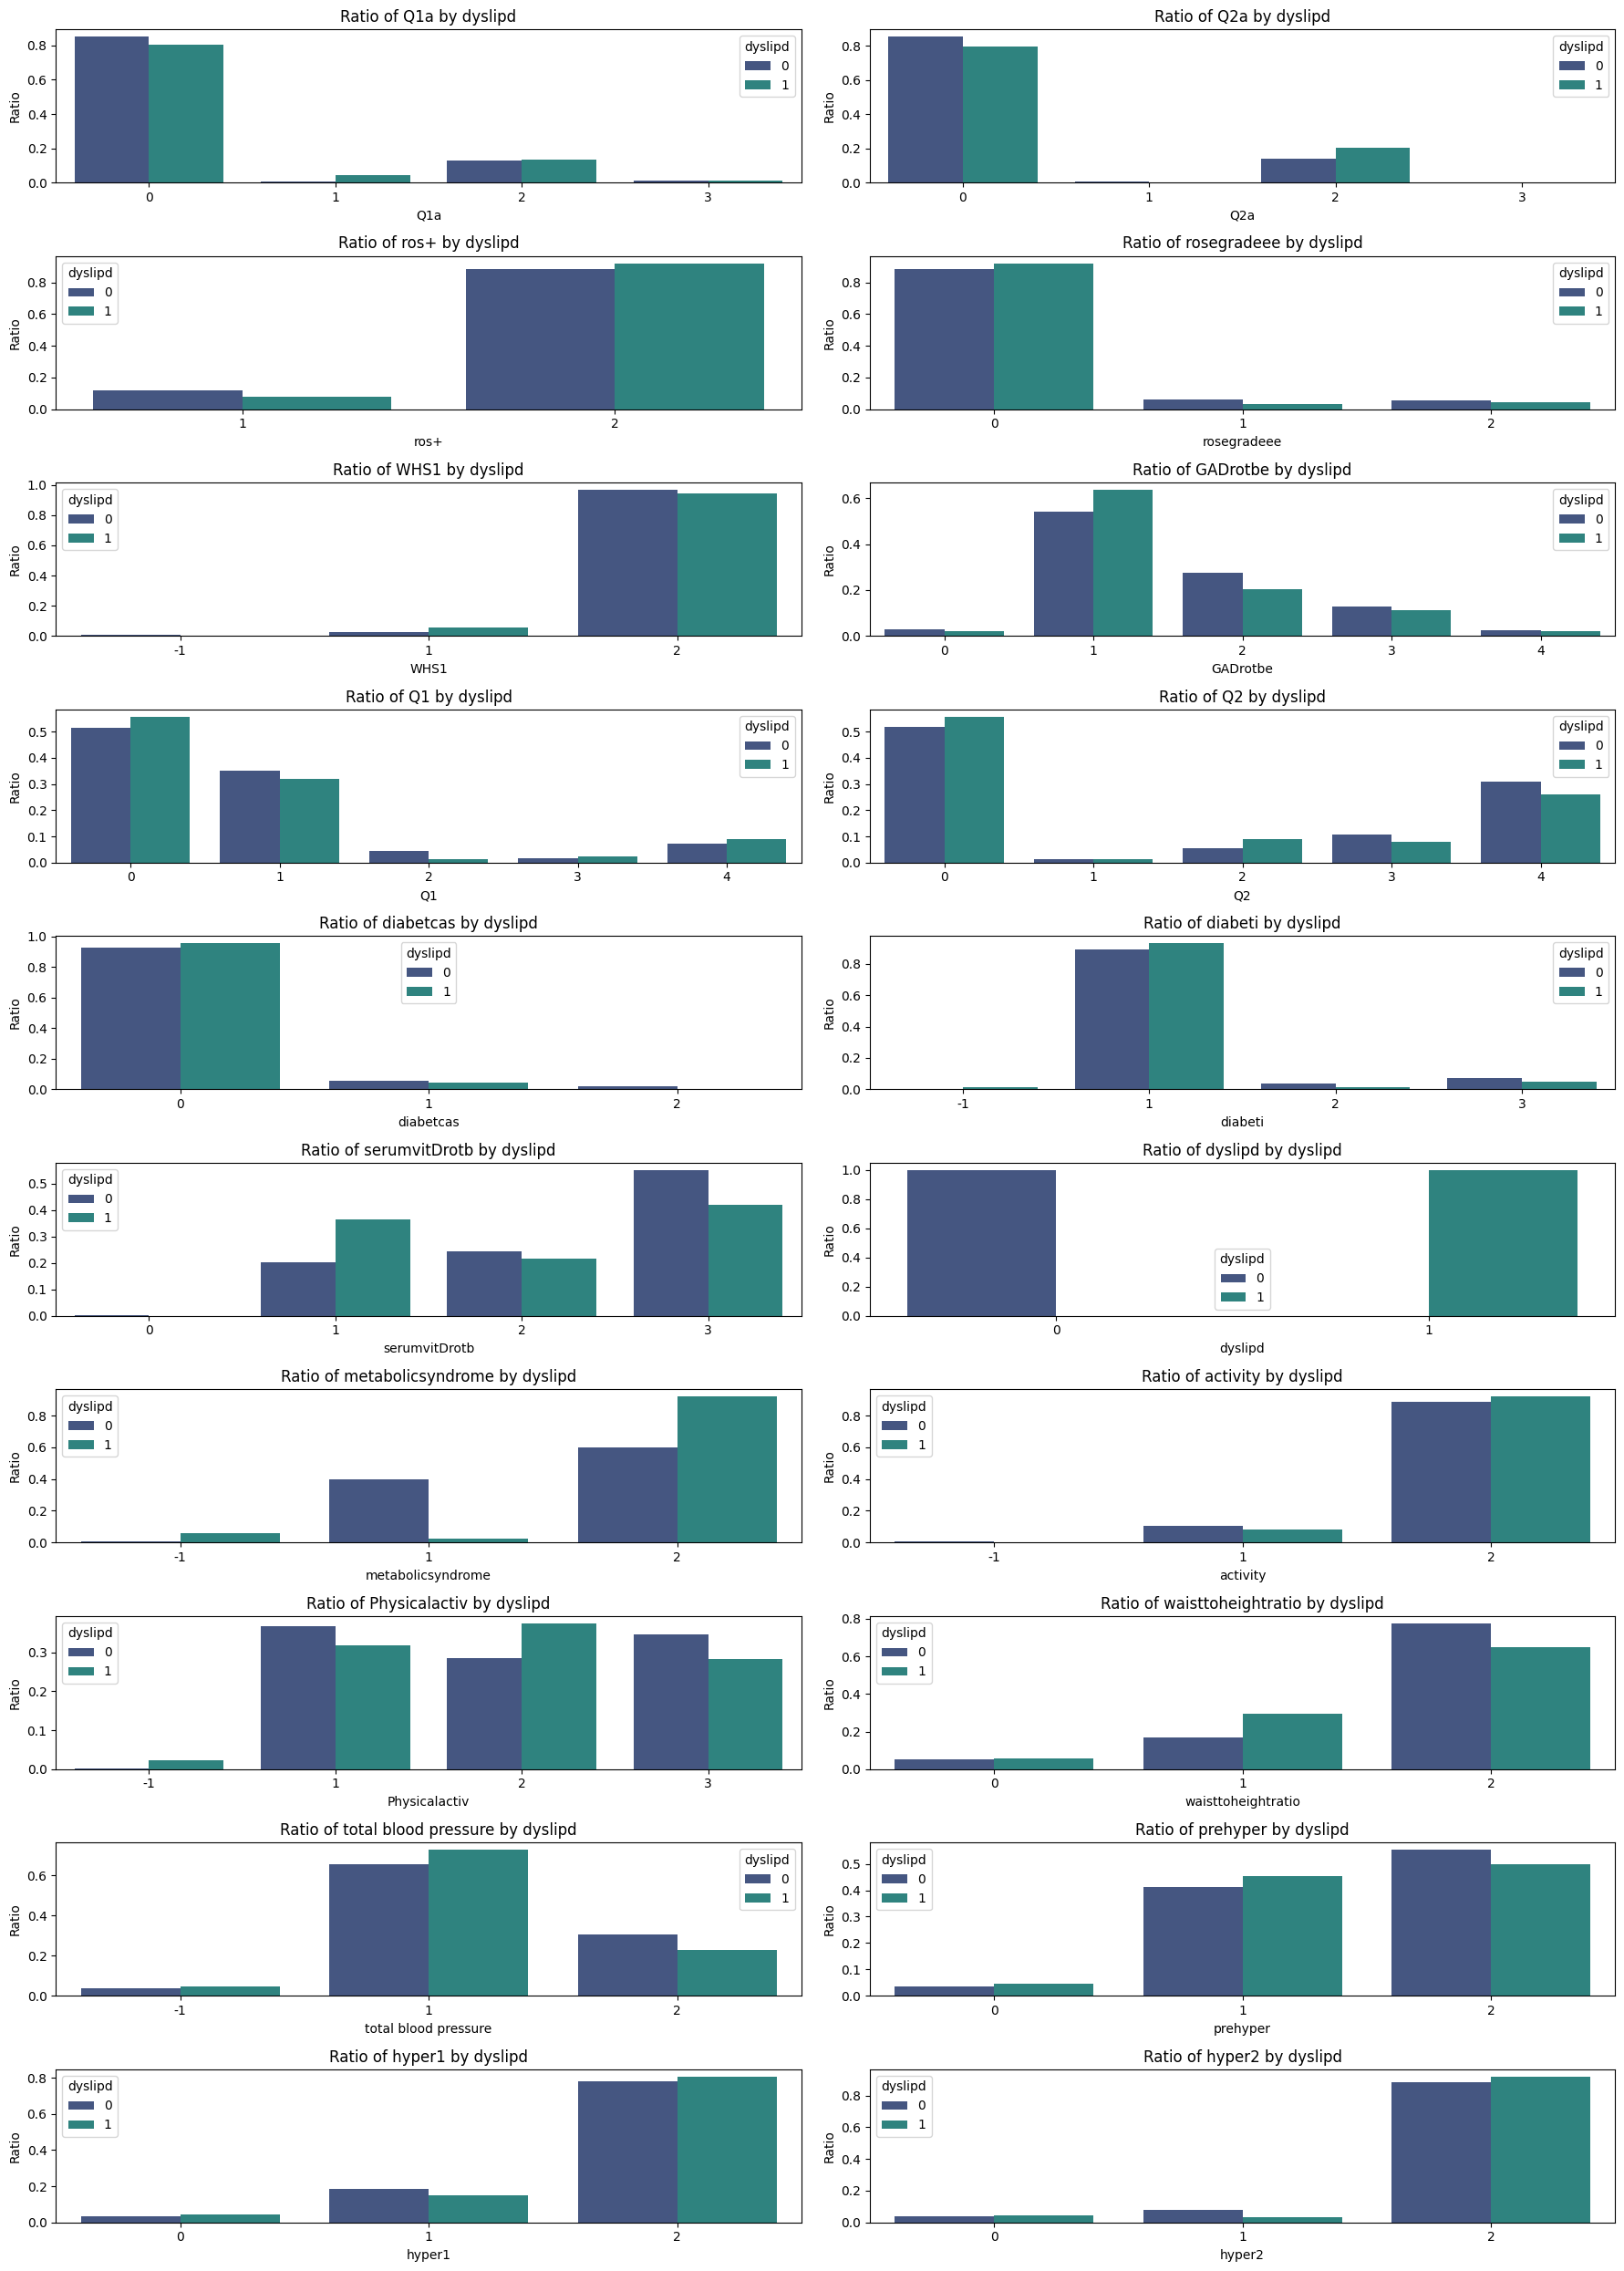

In [88]:
value_columns_cviridis = [
    ('Q1a', 'Q1a'), 
    ('Q2a', 'Q2a'), 
    ('ros+', 'ros+'),
    ('rosegradeee', 'rosegradeee'), 
    ('WHS1', 'WHS1'), 
    ('GADrotbe', 'GADrotbe'),
    ('Q1', 'Q1'), 
    ('Q2', 'Q2'), 
    ('diabetcas', 'diabetcas'),
    ('diabeti', 'diabeti'), 
    ('serumvitDrotb', 'serumvitDrotb'), 
    ('dyslipd', 'dyslipd'), 
    ('metabolicsyndrome', 'metabolicsyndrome'), 
    ('activity', 'activity'), 
    ('Physicalactiv', 'Physicalactiv'), 
    ('waisttoheightratio', 'waisttoheightratio'), 
    ('total blood pressure', 'total blood pressure'), 
    ('prehyper', 'prehyper'), 
    ('hyper1', 'hyper1'), 
    ('hyper2', 'hyper2')
]

fig, axes = plt.subplots(10, 2, figsize=(18, 25))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_cviridis):
    calculate_and_plot_ratio(df, ['dyslipd', group_col], value_col, ax, palette=palette_viridis)

plt.tight_layout()
plt.show()

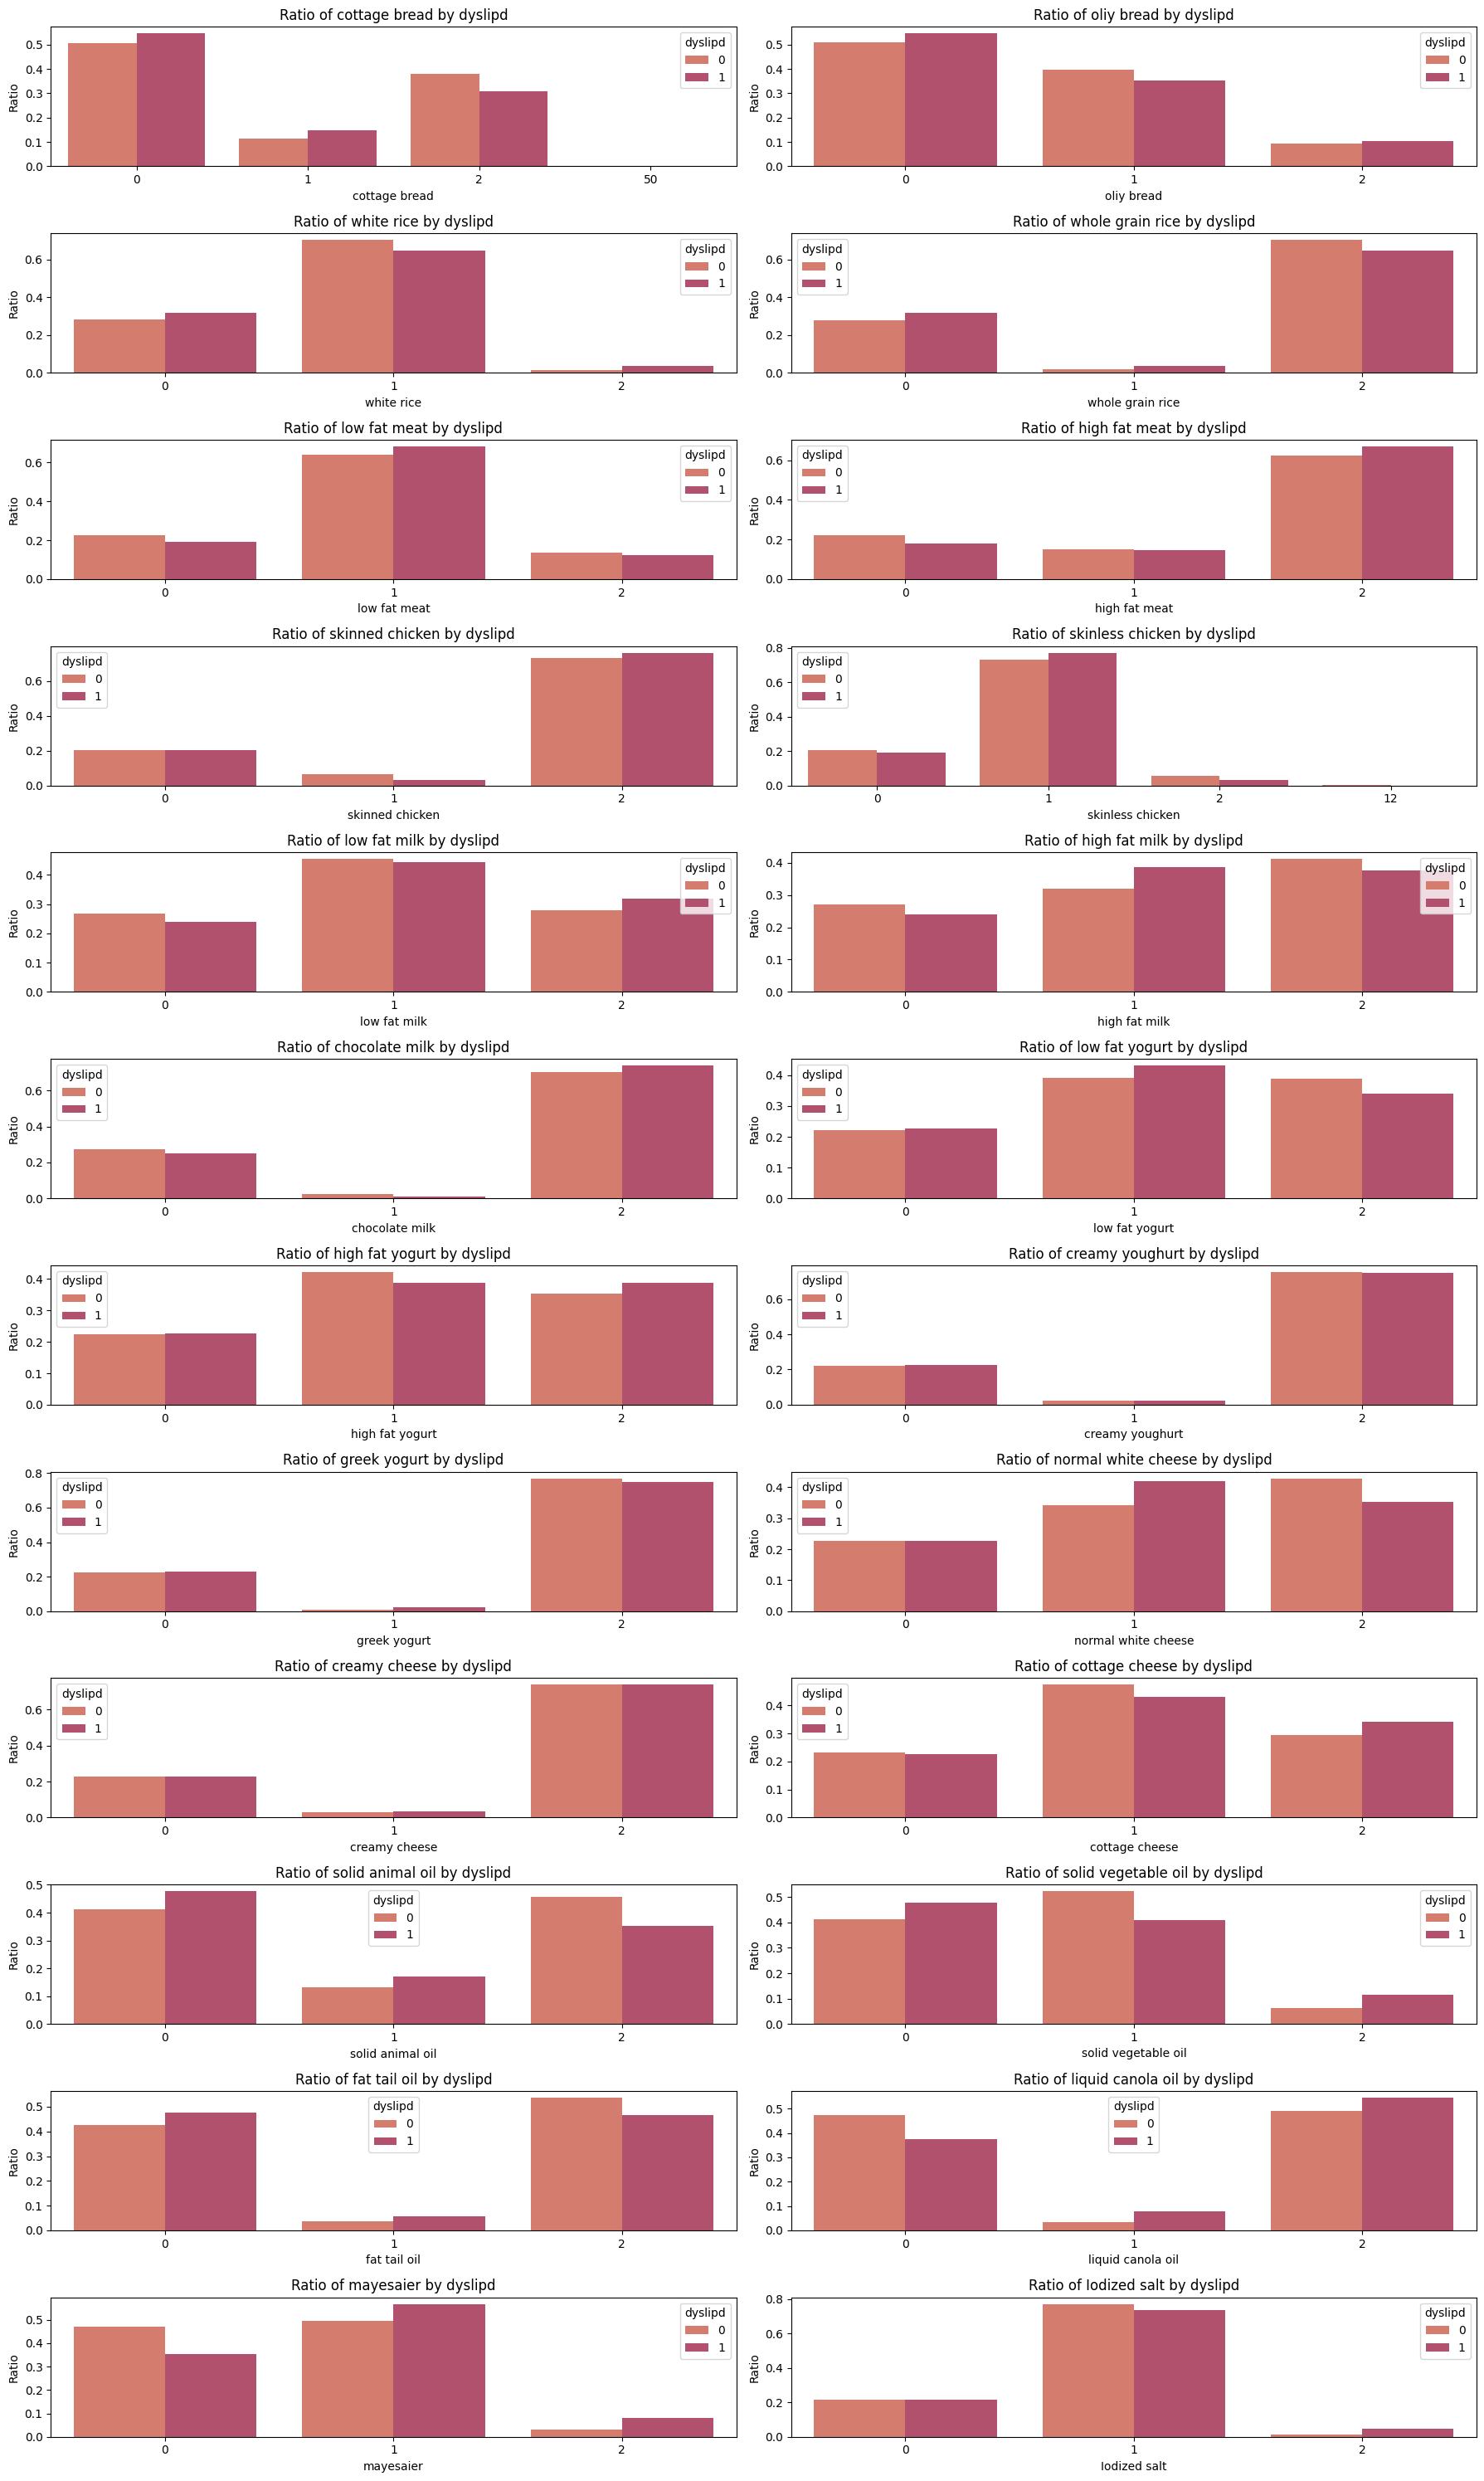

In [73]:
value_columns_flare = [
    ('cottage bread', 'cottage bread'),
    ('oliy bread', 'oliy bread'),
    ('white rice', 'white rice'),
    ('whole grain rice', 'whole grain rice'),
    ('low fat meat', 'low fat meat'),
    ('high fat meat', 'high fat meat'),
    ('skinned chicken', 'skinned chicken'),
    ('skinless chicken', 'skinless chicken'),
    ('low fat milk', 'low fat milk'),
    ('high fat milk', 'high fat milk'),
    ('chocolate milk', 'chocolate milk'),
    ('low fat yogurt', 'low fat yogurt'),
    ('high fat yogurt', 'high fat yogurt'),
    ('creamy youghurt', 'creamy youghurt'),
    ('greek yogurt', 'greek yogurt'),
    ('normal white cheese', 'normal white cheese'),
    ('creamy cheese', 'creamy cheese'),
    ('cottage cheese', 'cottage cheese'),
    ('solid animal oil', 'solid animal oil'),
    ('solid vegetable oil', 'solid vegetable oil'),
    ('fat tail oil', 'fat tail oil'),
    ('liquid canola oil', 'liquid canola oil'),
    ('mayesaier', 'mayesaier'),
    ('Iodized salt', 'Iodized salt')
]


fig, axes = plt.subplots(12, 2, figsize=(18, 30))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_flare):
    calculate_and_plot_ratio(df, ['dyslipd', group_col], value_col, ax, palette=palette_flare)

plt.tight_layout()
plt.show()

In [74]:
df = df.drop(columns=['Ratio'])

## Plotting the ratio of -  Binned Float  - columns with 'DYSLIPD' for studying relations

In [100]:
palette_hls = sns.color_palette("hls", 6)
palette_hls2 = sns.color_palette("hls", 2)

def calculate_and_plot_ratio(data, group_columns, value_column, ax, palette):
    # Calculate the total count
    total_counts = data.groupby(group_columns[0])[value_column].transform('count')
    
    # Calculate the ratio
    data['Ratio'] = data.groupby(group_columns)[value_column].transform('count') / total_counts
    
    # Plotting
    sns.barplot(data=data, x=value_column, y='Ratio', hue=group_columns[0], palette=palette, ax=ax)
    ax.set_title(f'Ratio of {value_column} by {group_columns[0]}')
    ax.set_xlabel(value_column)
    ax.set_ylabel('Ratio')
    ax.legend(title=group_columns[0])

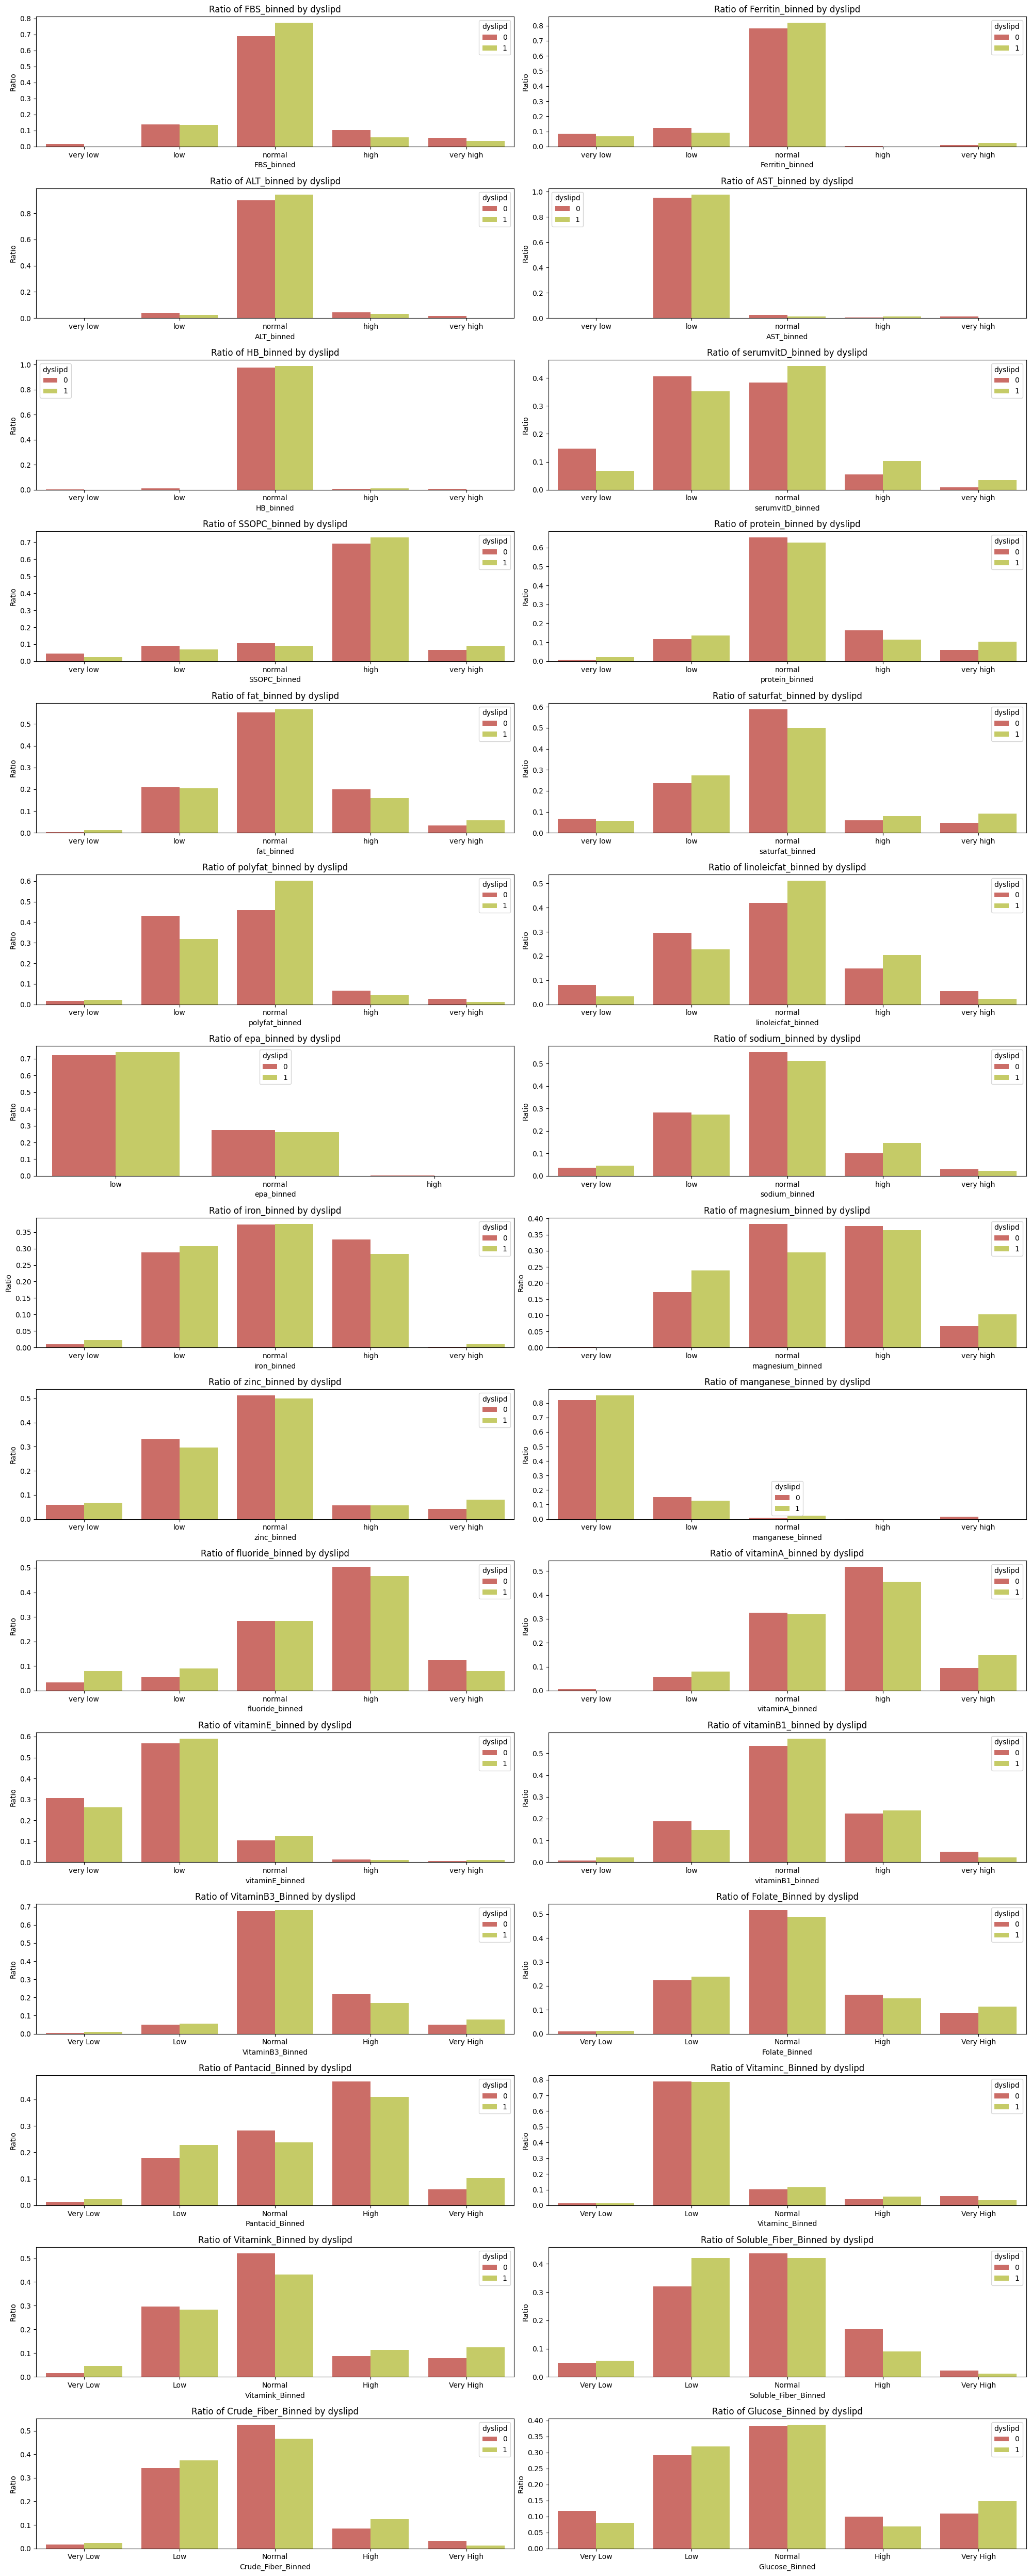

In [93]:
value_columns_hls1 = [
    ('FBS_binned', 'FBS_binned'),
    ('Ferritin_binned', 'Ferritin_binned'),
    ('ALT_binned', 'ALT_binned'),
    ('AST_binned', 'AST_binned'),
    ('HB_binned', 'HB_binned'),
    ('serumvitD_binned', 'serumvitD_binned'),
    ('SSOPC_binned', 'SSOPC_binned'),
    ('protein_binned', 'protein_binned'),
    ('fat_binned', 'fat_binned'),
    ('saturfat_binned', 'saturfat_binned'),
    ('polyfat_binned', 'polyfat_binned'),
    ('linoleicfat_binned', 'linoleicfat_binned'),
    ('epa_binned', 'epa_binned'),
    ('sodium_binned', 'sodium_binned'),
    ('iron_binned', 'iron_binned'),
    ('magnesium_binned', 'magnesium_binned'),
    ('zinc_binned', 'zinc_binned'),
    ('manganese_binned', 'manganese_binned'),
    ('fluoride_binned', 'fluoride_binned'),
    ('vitaminA_binned', 'vitaminA_binned'),
    ('vitaminE_binned', 'vitaminE_binned'),
    ('vitaminB1_binned', 'vitaminB1_binned'),
    ('VitaminB3_Binned', 'VitaminB3_Binned'),
    ('Folate_Binned', 'Folate_Binned'),
    ('Pantacid_Binned', 'Pantacid_Binned'),
    ('Vitaminc_Binned', 'Vitaminc_Binned'),
    ('Vitamink_Binned', 'Vitamink_Binned'),
    ('Soluble_Fiber_Binned', 'Soluble_Fiber_Binned'),
    ('Crude_Fiber_Binned', 'Crude_Fiber_Binned'),
    ('Glucose_Binned', 'Glucose_Binned'),
    ('Kilocalories_Binned', 'Kilocalories_Binned'),
    ('Carbohydrate_Binned', 'Carbohydrate_Binned'),
    ('Cholesterol_Binned', 'Cholesterol_Binned'),
    ('Monounsaturated_Fat_Binned', 'Monounsaturated_Fat_Binned'),
    ('Oleic_Fat_Binned', 'Oleic_Fat_Binned')
]


fig, axes = plt.subplots(15, 2, figsize=(20, 50))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_hls1):
    calculate_and_plot_ratio(df, ['dyslipd', group_col], value_col, ax, palette=palette_hls)

plt.tight_layout()
plt.show()

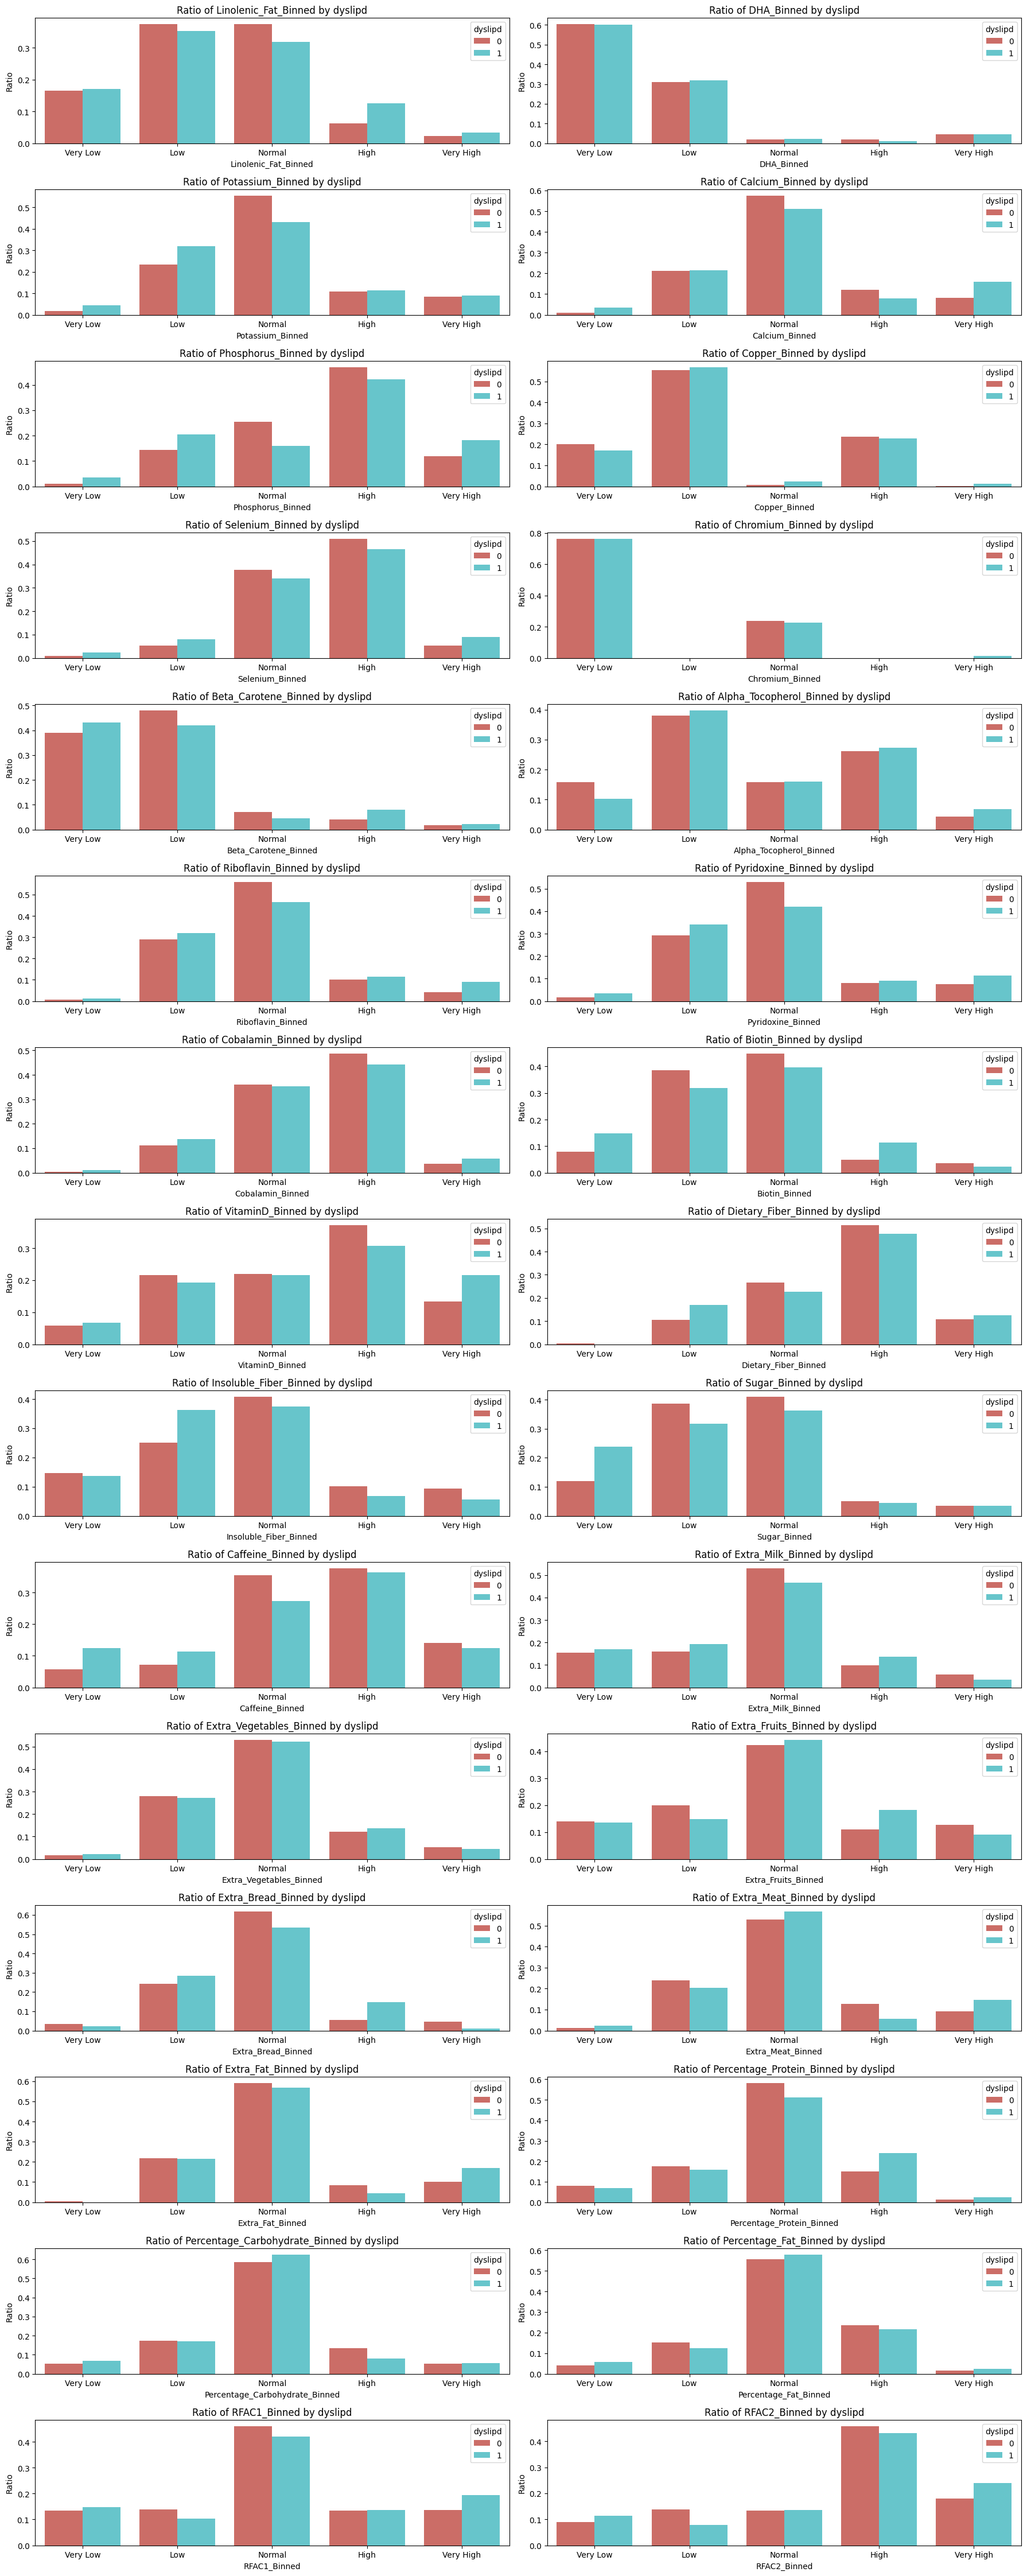

In [101]:
value_columns_hls2 = [
    ('Linolenic_Fat_Binned', 'Linolenic_Fat_Binned'),
    ('DHA_Binned', 'DHA_Binned'),
    ('Potassium_Binned', 'Potassium_Binned'),
    ('Calcium_Binned', 'Calcium_Binned'),
    ('Phosphorus_Binned', 'Phosphorus_Binned'),
    ('Copper_Binned', 'Copper_Binned'),
    ('Selenium_Binned', 'Selenium_Binned'),
    ('Chromium_Binned', 'Chromium_Binned'),
    ('Beta_Carotene_Binned', 'Beta_Carotene_Binned'),
    ('Alpha_Tocopherol_Binned', 'Alpha_Tocopherol_Binned'),
    ('Riboflavin_Binned', 'Riboflavin_Binned'),
    ('Pyridoxine_Binned', 'Pyridoxine_Binned'),
    ('Cobalamin_Binned', 'Cobalamin_Binned'),
    ('Biotin_Binned', 'Biotin_Binned'),
    ('VitaminD_Binned', 'VitaminD_Binned'),
    ('Dietary_Fiber_Binned', 'Dietary_Fiber_Binned'),
    ('Insoluble_Fiber_Binned', 'Insoluble_Fiber_Binned'),
    ('Sugar_Binned', 'Sugar_Binned'),
    ('Caffeine_Binned', 'Caffeine_Binned'),
    ('Extra_Milk_Binned', 'Extra_Milk_Binned'),
    ('Extra_Vegetables_Binned', 'Extra_Vegetables_Binned'),
    ('Extra_Fruits_Binned', 'Extra_Fruits_Binned'),
    ('Extra_Bread_Binned', 'Extra_Bread_Binned'),
    ('Extra_Meat_Binned', 'Extra_Meat_Binned'),
    ('Extra_Fat_Binned', 'Extra_Fat_Binned'),
    ('Percentage_Protein_Binned', 'Percentage_Protein_Binned'),
    ('Percentage_Carbohydrate_Binned', 'Percentage_Carbohydrate_Binned'),
    ('Percentage_Fat_Binned', 'Percentage_Fat_Binned'),
    ('RFAC1_Binned', 'RFAC1_Binned'),
    ('RFAC2_Binned', 'RFAC2_Binned'),
    ('RFAC3_Binned', 'RFAC3_Binned')
]

fig, axes = plt.subplots(15, 2, figsize=(18, 45))
axes = axes.flatten()

for ax, (group_col, value_col) in zip(axes, value_columns_hls2):
    calculate_and_plot_ratio(df, ['dyslipd', group_col], value_col, ax, palette=palette_hls2)

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['sex', 'Number of family members', 'age', 'Marital Status',
       'Education Level', 'Occupation', 'BMI (Body Mass Index) Category',
       'Female Waist Circumference', 'Male Waist Circumference', 'feshrdarj2',
       ...
       'Extra_Bread_Binned', 'Extra_Meat_Binned', 'Extra_Fat_Binned',
       'Percentage_Protein_Binned', 'Percentage_Carbohydrate_Binned',
       'Percentage_Fat_Binned', 'RFAC1_Binned', 'RFAC2_Binned', 'RFAC3_Binned',
       'Ratio'],
      dtype='object', length=199)

### Handeling Categorical Variables

In [39]:
columns_to_label = [ "FBS_binned", "Ferritin_binned", "ALT_binned", "AST_binned", "HB_binned", "serumvitD_binned"]

columns_to_ordinal = [
    "SSOPC_binned", "protein_binned", "fat_binned", 
    "saturfat_binned", "polyfat_binned", "linoleicfat_binned", "epa_binned", 
    "sodium_binned", "iron_binned", "magnesium_binned", "zinc_binned", 
    "manganese_binned", "fluoride_binned", "vitaminA_binned", "vitaminE_binned", 
    "vitaminB1_binned", "VitaminB3_Binned", "Folate_Binned", "Pantacid_Binned", 
    "Vitaminc_Binned", "Vitamink_Binned", "Soluble_Fiber_Binned", 
    "Crude_Fiber_Binned", "Glucose_Binned", "Kilocalories_Binned", 
    "Carbohydrate_Binned", "Cholesterol_Binned", "Monounsaturated_Fat_Binned", 
    "Oleic_Fat_Binned", "Linolenic_Fat_Binned", "DHA_Binned", "Potassium_Binned", 
    "Calcium_Binned", "Phosphorus_Binned", "Copper_Binned", "Selenium_Binned", 
    "Chromium_Binned", "Beta_Carotene_Binned", "Alpha_Tocopherol_Binned", 
    "Riboflavin_Binned", "Pyridoxine_Binned", "Cobalamin_Binned", "Biotin_Binned", 
    "VitaminD_Binned", "Dietary_Fiber_Binned", "Insoluble_Fiber_Binned", 
    "Sugar_Binned", "Caffeine_Binned", "Extra_Milk_Binned", "Extra_Vegetables_Binned", 
    "Extra_Fruits_Binned", "Extra_Bread_Binned", "Extra_Meat_Binned", 
    "Extra_Fat_Binned", "Percentage_Protein_Binned", "Percentage_Carbohydrate_Binned", 
    "Percentage_Fat_Binned", "RFAC1_Binned", "RFAC2_Binned", "RFAC3_Binned"
]

label_encoder = LabelEncoder()

ordinal_encoder = OrdinalEncoder(categories=[['very low', 'low', 'normal', 'high', 'very high']])

for column in columns_to_label:
    df[column] = label_encoder.fit_transform(df[column])
    
for column in columns_to_ordinal:
    df[column] = Ordinal_encoder.fit_transform(df[column])
    
    
df.head()

ValueError: Expected 2D array, got 1D array instead:
array=['high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'very low'
 'very high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'normal' 'normal'
 'low' 'low' 'normal' 'high' 'normal' 'normal' 'high' 'high' 'very high'
 'high' 'high' 'normal' 'high' 'high' 'high' 'high' 'high' 'high'
 'very low' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'very low' 'low' 'high' 'very low' 'high'
 'low' 'very low' 'normal' 'high' 'high' 'high' 'high' 'high' 'very high'
 'low' 'high' 'very high' 'low' 'very high' 'very low' 'high' 'normal'
 'high' 'high' 'normal' 'normal' 'high' 'normal' 'very high' 'low' 'high'
 'high' 'high' 'high' 'normal' 'high' 'high' 'low' 'high' 'low' 'high'
 'low' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'very low' 'high' 'high' 'high' 'very high' 'low' 'high'
 'high' 'high' 'high' 'low' 'high' 'high' 'high' 'high' 'high' 'high'
 'very high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'normal'
 'very low' 'normal' 'high' 'high' 'high' 'low' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'very high' 'high' 'high' 'high'
 'very high' 'high' 'low' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'low' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'normal' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'normal' 'normal' 'very low' 'low' 'very high' 'very high' 'very high'
 'high' 'high' 'very high' 'low' 'low' 'low' 'high' 'low' 'very low'
 'high' 'high' 'high' 'very low' 'low' 'high' 'high' 'high' 'very low'
 'very low' 'very low' 'very low' 'very low' 'high' 'high' 'low' 'high'
 'high' 'high' 'very high' 'high' 'high' 'high' 'very high' 'high'
 'very high' 'high' 'very high' 'high' 'very high' 'high' 'high' 'low'
 'very low' 'very high' 'high' 'high' 'high' 'high' 'high' 'normal'
 'normal' 'normal' 'very high' 'high' 'high' 'normal' 'very high' 'high'
 'very high' 'normal' 'normal' 'low' 'normal' 'low' 'high' 'high' 'low'
 'high' 'high' 'high' 'very low' 'normal' 'high' 'low' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'low' 'normal'
 'very high' 'very high' 'very high' 'high' 'very high' 'high' 'high'
 'high' 'high' 'high' 'normal' 'very high' 'high' 'high' 'very high'
 'very high' 'normal' 'high' 'high' 'high' 'high' 'high' 'high' 'low'
 'normal' 'normal' 'normal' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'normal' 'high' 'high' 'high' 'high' 'high' 'normal' 'high'
 'normal' 'low' 'high' 'normal' 'high' 'very low' 'normal' 'high' 'high'
 'very high' 'high' 'low' 'high' 'normal' 'high' 'high' 'high' 'very high'
 'normal' 'high' 'high' 'high' 'normal' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'low' 'high' 'high' 'low' 'high' 'high' 'very low' 'high'
 'high' 'high' 'high' 'low' 'high' 'high' 'high' 'high' 'very low'
 'very high' 'very high' 'low' 'high' 'high' 'normal' 'high' 'normal'
 'normal' 'normal' 'low' 'high' 'low' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'very high' 'very high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'normal' 'low' 'high' 'normal' 'high' 'very low' 'high'
 'high' 'high' 'very high' 'normal' 'high' 'very high' 'high' 'normal'
 'high' 'normal' 'low' 'low' 'normal' 'low' 'low' 'very high' 'normal'
 'high' 'normal' 'normal' 'normal' 'low' 'normal' 'high' 'high' 'low'
 'high' 'high' 'high' 'normal' 'high' 'low' 'high' 'low' 'high' 'high'
 'high' 'high' 'low' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'very low' 'high' 'normal'
 'high' 'high' 'high' 'low' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'low' 'high' 'high' 'normal' 'high' 'high'
 'high' 'high' 'normal' 'high' 'very high' 'high' 'high'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.